# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always', category=UserWarning)


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random
from datetime import datetime

from joblib import Parallel, delayed

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file
df = pd.read_parquet('D:/Study/upgrad/EDA on NYC Taxi Records/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [11]:
# Sample the data
# It is recommended to not load all the files at once to avoid memory overload

# Function to process data by date and hour for sampling
def process_data(month_data, date):
    # Filter data for the given date
    day_data = month_data[month_data['pickup_date'] == date]
    
    # Initialize an empty DataFrame for the sampled data of this day
    sampled_data = pd.DataFrame()
    
    # Iterate through each hour (0-23) and sample 5% of the data for that hour
    for hour in range(24):
        hour_data = day_data[day_data['pickup_hour'] == hour]
        sampled_hour_data = hour_data.sample(frac=0.01, random_state=42)
        sampled_data = pd.concat([sampled_data, sampled_hour_data], ignore_index=True)
    
    return sampled_data



In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

data_folder_path = 'D:/Study/upgrad/EDA on NYC Taxi Records/trip_records/'


In [15]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Set the working directory to where the data files are located
os.chdir(data_folder_path)  # Adjust this path if necessary

# Create a list of all files in the directory
file_list = [file for file in os.listdir() if file.endswith('.parquet')]  # Filter only .parquet files

# Initialize an empty dataframe for storing all the sampled data
df = pd.DataFrame()

# Iterate through the list of files and process each one
for file_name in file_list:
    try:
        # Construct the file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Read the current Parquet file
        month_data = pd.read_parquet(file_path)

        # Ensure the 'tpep_pickup_datetime' column exists
        if 'tpep_pickup_datetime' not in month_data.columns:
            print(f"Error: 'tpep_pickup_datetime' column not found in {file_name}")
            continue

        # Convert 'tpep_pickup_datetime' to datetime and extract date and hour
        month_data['pickup_datetime'] = pd.to_datetime(month_data['tpep_pickup_datetime'])
        month_data['pickup_date'] = month_data['pickup_datetime'].dt.date
        month_data['pickup_hour'] = month_data['pickup_datetime'].dt.hour

        # Get the unique dates in the month data
        unique_dates = month_data['pickup_date'].unique()

        # Parallel processing for each date to speed up the sampling
        sampled_data_chunks = Parallel(n_jobs=-1)(delayed(process_data)(month_data, date) for date in unique_dates)

        # Combine the sampled chunks into one DataFrame
        sampled_data = pd.concat(sampled_data_chunks, ignore_index=True)

        # Append the sampled data from this month to the final DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f"Processed {file_name} successfully")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# After processing all files, check the shape of the final DataFrame
print(f"Final DataFrame shape: {df.shape}")

Processed 2023-1.parquet successfully
Processed 2023-10.parquet successfully
Processed 2023-11.parquet successfully
Processed 2023-12.parquet successfully
Processed 2023-2.parquet successfully
Processed 2023-3.parquet successfully
Processed 2023-4.parquet successfully
Processed 2023-5.parquet successfully
Processed 2023-6.parquet successfully
Processed 2023-7.parquet successfully
Processed 2023-8.parquet successfully
Processed 2023-9.parquet successfully
Final DataFrame shape: (379268, 23)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [29]:
# Store the df in csv/parquet
# df.to_parquet('')
# Convert 'pickup_date' to datetime
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df.to_parquet('../sample_nyc_taxi_data_2023_4.parquet',engine='fastparquet')

In [31]:
# Load the new data file
df= pd.read_parquet('../sample_nyc_taxi_data_2023_4.parquet')


In [33]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   
5           7.10         1.0                  N           246            37   
6           1.59         1.0                  N            79           164   
7           3.16         1.0                  N            79           256   
8           7.64         1.0                  N           132            95   
9           0.90         1.0                  N           148           114   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             2  ...        0.00           0.0                    1.0   
1             1  ...        2.58           0.0                    1.0   
2             2  ...        0.00           0.0                    1.0   
3             2  ...        0.00           0.0                    1.0   
4             0  ...        5.93           0.0                    1.0   
5             1  ...        7.90           0.0                    1.0   
6             1  ...        3.28           0.0                    1.0   
7             1  ...        6.02           0.0                    1.0   
8             1  ...        7.09           0.0                    1.0   
9             1  ...        1.00           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee     pickup_datetime  \
0         41.15                   0.0         1.25 2023-01-01 00:07:18   
1         15.48                   2.5         0.00 2023-01-01 00:16:41   
2         16.40                   2.5         0.00 2023-01-01 00:14:03   
3         11.50                   2.5         0.00 2023-01-01 00:24:30   
4         35.57                   NaN          NaN 2023-01-01 00:43:00   
5         47.40                   2.5         0.00 2023-01-01 00:42:56   
6         19.68                   2.5         0.00 2023-01-01 00:58:00   
7         30.12                   2.5         0.00 2023-01-01 00:16:06   
8         42.54                   0.0         1.25 2023-01-01 00:44:09   
9         13.90                   2.5         0.00 2023-01-01 00:15:25   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  
5   2023-01-01            0         NaN  
6   2023-01-01            0         NaN  
7   2023-01-01            0         NaN  
8   2023-01-01            0         NaN  
9   2023-01-01            0         NaN  

[10 rows x 23 columns]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

In [37]:
print("Number of rows in the final dataset:", df.shape[0])

Number of rows in the final dataset: 379268


In [33]:
df.shape

(1896400, 23)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   store_and_fwd_flag     366326 non-null  object        
 7   PULocationID           379268 non-null  int64         
 8   DOLocationID           379268 non-null  int64         
 9   payment_type           379268 non-null  int64         
 10  fare_amount            379268 non-null  float64       
 11  extra                  379268 non-null  float64       
 12  mta_tax                379268 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [41]:
# Fix the index and drop any columns that are not needed
# Check the column names
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee',
       'pickup_datetime', 'pickup_date', 'pickup_hour', 'Airport_fee'],
      dtype='object')

In [43]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)

In [45]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    364168
Y      2158
Name: count, dtype: int64

In [47]:
# Need to drop this column due to the N values majority 
df.drop(columns=['store_and_fwd_flag'], inplace=True)

In [49]:
missing_percentage = df.isnull().mean() * 100

In [51]:
print(missing_percentage)

VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.412363
trip_distance             0.000000
RatecodeID                3.412363
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.412363
airport_fee              92.176245
pickup_datetime           0.000000
pickup_date               0.000000
pickup_hour               0.000000
Airport_fee              11.236118
dtype: float64


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [53]:
# Inspect the values of the airport fee columns
df[['airport_fee', 'Airport_fee']].head()

airport_fee  Airport_fee
0         1.25          NaN
1         0.00          NaN
2         0.00          NaN
3         0.00          NaN
4          NaN          NaN

In [55]:
# As Airport_fee and airport_fee have the missing value percentage on higher end we need to provide the missing value
# because we can not remove it because its monetory column so best to keep it and add the missing value with the median of the column then we will
# combine this column

# 1. airport_fee handling missing values
airport_fee_med = df["airport_fee"].median()
df["airport_fee"] = df["airport_fee"].fillna(airport_fee_med)


In [57]:
# 2. Airport_fee handling missing values
Airport_fee_med=df["Airport_fee"].median()
df["Airport_fee"] = df["Airport_fee"].fillna(Airport_fee_med)

In [59]:
# 3. Now we will combine Airport_fee and airport_fee columns into one 
df["airport_fee_combined"] = df["airport_fee"] + df["Airport_fee"]

# 4. Now need to drop the Airport_fee and airport_fee column to avoid the redundant data into dataset
df.drop("airport_fee",axis=1,inplace=True)
df.drop("Airport_fee",axis=1,inplace=True)


In [61]:
# lets check the dataset

df.head(10)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9         1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   
5           7.10         1.0           246            37             1   
6           1.59         1.0            79           164             1   
7           3.16         1.0            79           256             1   
8           7.64         1.0           132            95             1   
9           0.90         1.0           148           114             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   
5        34.50  ...      0.5        7.90           0.0                    1.0   
6        11.40  ...      0.5        3.28           0.0                    1.0   
7        19.10  ...      0.5        6.02           0.0                    1.0   
8        31.70  ...      0.5        7.09           0.0                    1.0   
9         7.90  ...      0.5        1.00           0.0                    1.0   

   total_amount  congestion_surcharge     pickup_datetime pickup_date  \
0         41.15                   0.0 2023-01-01 00:07:18  2023-01-01   
1         15.48                   2.5 2023-01-01 00:16:41  2023-01-01   
2         16.40                   2.5 2023-01-01 00:14:03  2023-01-01   
3         11.50                   2.5 2023-01-01 00:24:30  2023-01-01   
4         35.57                   NaN 2023-01-01 00:43:00  2023-01-01   
5         47.40                   2.5 2023-01-01 00:42:56  2023-01-01   
6         19.68                   2.5 2023-01-01 00:58:00  2023-01-01   
7         30.12                   2.5 2023-01-01 00:16:06  2023-01-01   
8         42.54                   0.0 2023-01-01 00:44:09  2023-01-01   
9         13.90                   2.5 2023-01-01 00:15:25  2023-01-01   

  pickup_hour  airport_fee_combined  
0           0                  1.25  
1           0                  0.00  
2           0                  0.00  
3           0                  0.00  
4           0                  0.00  
5           0                  0.00  
6           0                  0.00  
7           0                  0.00  
8           0                  1.25  
9           0                  0.00  

[10 rows x 21 columns]

In [63]:
missing_percentage = df.isnull().mean() * 100

print(missing_percentage)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.412363
trip_distance            0.000000
RatecodeID               3.412363
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.412363
pickup_datetime          0.000000
pickup_date              0.000000
pickup_hour              0.000000
airport_fee_combined     0.000000
dtype: float64


**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379268 entries, 0 to 379267
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               379268 non-null  int64         
 1   tpep_pickup_datetime   379268 non-null  datetime64[us]
 2   tpep_dropoff_datetime  379268 non-null  datetime64[us]
 3   passenger_count        366326 non-null  float64       
 4   trip_distance          379268 non-null  float64       
 5   RatecodeID             366326 non-null  float64       
 6   PULocationID           379268 non-null  int64         
 7   DOLocationID           379268 non-null  int64         
 8   payment_type           379268 non-null  int64         
 9   fare_amount            379268 non-null  float64       
 10  extra                  379268 non-null  float64       
 11  mta_tax                379268 non-null  float64       
 12  tip_amount             379268 non-null  floa

In [67]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]

# There are no negative values in fare_amount column

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_datetime, pickup_date, pickup_hour, airport_fee_combined]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [69]:
# I observed some NaN values in RatecodeID column 

null_ratecode_rows = df["RatecodeID"].isnull().sum()

na_ratecode_rows = df["RatecodeID"].isna().sum()

print("Null value counts",null_ratecode_rows)
print("NA value counts",na_ratecode_rows)

# 64874 values are missing from this column

Null value counts 12942
NA value counts 12942


In [71]:
df["RatecodeID"].value_counts()

RatecodeID
1.0     345900
2.0      14327
99.0      2133
5.0       2066
3.0       1176
4.0        724
Name: count, dtype: int64

In [73]:
# Fill NaN values in 'RatecodeID' with the most common value (or a default value)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)  # Using mode (most frequent value)

In [75]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         1.0            66           107             0   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0        32.40  ...      0.5        0.00           0.0                    1.0   
1         7.90  ...      0.5        2.58           0.0                    1.0   
2        11.40  ...      0.5        0.00           0.0                    1.0   
3         6.50  ...      0.5        0.00           0.0                    1.0   
4        25.64  ...      0.5        5.93           0.0                    1.0   

   total_amount  congestion_surcharge     pickup_datetime pickup_date  \
0         41.15                   0.0 2023-01-01 00:07:18  2023-01-01   
1         15.48                   2.5 2023-01-01 00:16:41  2023-01-01   
2         16.40                   2.5 2023-01-01 00:14:03  2023-01-01   
3         11.50                   2.5 2023-01-01 00:24:30  2023-01-01   
4         35.57                   NaN 2023-01-01 00:43:00  2023-01-01   

  pickup_hour  airport_fee_combined  
0           0                  1.25  
1           0                  0.00  
2           0                  0.00  
3           0                  0.00  
4           0                  0.00  

[5 rows x 21 columns]

In [77]:
# Select only numeric columns to check for negative values
numeric_columns = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
print(numeric_columns)


Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_hour',
       'airport_fee_combined'],
      dtype='object')


In [79]:
# Find columns with negative values
negative_columns = numeric_columns[df[numeric_columns].lt(0).any()]

# Display the columns with negative values
print("Columns with negative values:\n", negative_columns)

# You can also check the number of negative values in each column:
negative_count = df[negative_columns].lt(0).sum()
print("\nNumber of negative values in each column:\n", negative_count)

Columns with negative values:
 Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee_combined'],
      dtype='object')

Number of negative values in each column:
 extra                     1
mta_tax                  15
improvement_surcharge    15
total_amount             15
congestion_surcharge     10
airport_fee_combined      3
dtype: int64


In [81]:
# Since negartive values are less when comparing with whole dataset so we can either remove it or set it to minimum values
# but total amount column also have the negative values and its important column so the best option is to remove such values(rows) to perform clean analysis 
for col in negative_columns:
    df.drop(df[df[col]<0].index, inplace=True)



In [83]:
# need to check once again after dropping the negative values

num_columns= df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

# again check which columns have negative values
negative_count = num_columns.lt(0).sum()
print(negative_count)

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_hour              0
airport_fee_combined     0
dtype: int64


In [85]:
df.head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5          1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7          2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8          2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9          1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
10         2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
11         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
12         2  2023-01-01 00:27:33   2023-01-01 00:36:38              2.0   
13         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
14         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
16         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
17         2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
18         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
19         1  2023-01-01 00:13:56   2023-01-01 00:23:05              4.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            7.74         1.0           138           256             2   
1            1.24         1.0           161           237             1   
2            1.44         1.0           237           141             2   
3            0.54         1.0           143           142             2   
4           19.24         1.0            66           107             0   
5            7.10         1.0           246            37             1   
6            1.59         1.0            79           164             1   
7            3.16         1.0            79           256             1   
8            7.64         1.0           132            95             1   
9            0.90         1.0           148           114             1   
10           0.78         1.0           237           229             2   
11           2.78         1.0            79           186             1   
12           0.85         1.0            90            68             1   
13           4.37         1.0           142           148             1   
14           2.43         1.0           144           186             1   
15          10.77         1.0           151           106             0   
16           0.74         1.0           229           141             1   
17           1.73         1.0           144           113             1   
18           2.95         1.0           164           236             1   
19           0.70         1.0           170           170             1   

    fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0         32.40  ...      0.5        0.00          0.00   
1          7.90  ...      0.5        2.58          0.00   
2         11.40  ...      0.5        0.00          0.00   
3          6.50  ...      0.5        0.00          0.00   
4         25.64  ...      0.5        5.93          0.00   
5         34.50  ...      0.5        7.90          0.00   
6         11.40  ...      0.5        3.28          0.00   
7         19.10  ...      0.5        6.02          0.00   
8         31.70  ...      0.5        7.09          0.00   
9          7.90  ...      0.5        1.00          0.00   
10         7.20  ...      0.5        0.00          0.00   
11        19.80  ...      0.5        4.96          0.00   
12        10.00  ...      0.5        3.75          0.00   
13   

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [89]:
# Find the proportion of missing values in each column

# Calculate the proportion of missing values in each column
missing_proportion = df.isnull().mean()

# Display the proportion of missing values for each column
print("Proportion of missing values in each column:\n", missing_proportion * 100)

#print(missing_proportion)


Proportion of missing values in each column:
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.412507
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.412507
pickup_datetime          0.000000
pickup_date              0.000000
pickup_hour              0.000000
airport_fee_combined     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [91]:
# Display the rows with null values
df[df['passenger_count'].isnull()]

# Impute NaN values in 'passenger_count'
passenger_count_med=df["passenger_count"].median()

# Handle Missing and Zero Values in passenger_count
df["passenger_count"]=df["passenger_count"].fillna(passenger_count_med)



Did you find zeroes in passenger_count? Handle these.

In [93]:
df["passenger_count"].value_counts()

passenger_count
1.0    289038
2.0     55131
3.0     13712
4.0      7613
0.0      5824
5.0      4744
6.0      3185
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [95]:
# zero passanger count is not possible, Hence we need to replace it with the median value
df["passenger_count"] = df['passenger_count'].apply(lambda x: passenger_count_med if x <=0 else x)

# after adding median values lets check it again
df["passenger_count"].value_counts()

passenger_count
1.0    294862
2.0     55131
3.0     13712
4.0      7613
5.0      4744
6.0      3185
8.0         2
7.0         2
9.0         1
Name: count, dtype: int64

In [97]:
df.head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
5          1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7          2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8          2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9          1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
10         2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
11         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
12         2  2023-01-01 00:27:33   2023-01-01 00:36:38              2.0   
13         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
14         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
16         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
17         2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
18         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
19         1  2023-01-01 00:13:56   2023-01-01 00:23:05              4.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            7.74         1.0           138           256             2   
1            1.24         1.0           161           237             1   
2            1.44         1.0           237           141             2   
3            0.54         1.0           143           142             2   
4           19.24         1.0            66           107             0   
5            7.10         1.0           246            37             1   
6            1.59         1.0            79           164             1   
7            3.16         1.0            79           256             1   
8            7.64         1.0           132            95             1   
9            0.90         1.0           148           114             1   
10           0.78         1.0           237           229             2   
11           2.78         1.0            79           186             1   
12           0.85         1.0            90            68             1   
13           4.37         1.0           142           148             1   
14           2.43         1.0           144           186             1   
15          10.77         1.0           151           106             0   
16           0.74         1.0           229           141             1   
17           1.73         1.0           144           113             1   
18           2.95         1.0           164           236             1   
19           0.70         1.0           170           170             1   

    fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0         32.40  ...      0.5        0.00          0.00   
1          7.90  ...      0.5        2.58          0.00   
2         11.40  ...      0.5        0.00          0.00   
3          6.50  ...      0.5        0.00          0.00   
4         25.64  ...      0.5        5.93          0.00   
5         34.50  ...      0.5        7.90          0.00   
6         11.40  ...      0.5        3.28          0.00   
7         19.10  ...      0.5        6.02          0.00   
8         31.70  ...      0.5        7.09          0.00   
9          7.90  ...      0.5        1.00          0.00   
10         7.20  ...      0.5        0.00          0.00   
11        19.80  ...      0.5        4.96          0.00   
12        10.00  ...      0.5        3.75          0.00   
13   

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [99]:
# Fix missing values in 'RatecodeID'
# we have already handled the missing values for RatecodeID but as it mentioned here we are going to perform it again

missing_ratecode = df['RatecodeID'].isnull().sum()
print(f"Number of missing values in 'RatecodeID': {missing_ratecode}")

Number of missing values in 'RatecodeID': 0


In [101]:
# Step 1: Impute missing values in 'RatecodeID' with the most frequent value (mode)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

# Verify that there are no missing values in 'RatecodeID' after imputation
missing_ratecode_after_imputation = df['RatecodeID'].isnull().sum()
print(f"Number of missing values in 'RatecodeID' after imputation: {missing_ratecode_after_imputation}")

# Display the first few rows to verify the change
df[['RatecodeID']].head()

Number of missing values in 'RatecodeID' after imputation: 0


RatecodeID
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [103]:
# handle null values in congestion_surcharge
print(df["congestion_surcharge"].value_counts())

# Check the number of missing values in 'congestion_surcharge'
missing_congestion_surcharge = df['congestion_surcharge'].isnull().sum()

print(f"Missing values in 'congestion_surcharge': {missing_congestion_surcharge}")

# Impute missing values in 'congestion_surcharge' with the median
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


# Verify that there are no missing values in 'congestion_surcharge' after imputation
missing_congestion_surcharge_after_imputation = df['congestion_surcharge'].isnull().sum()
print(f"Number of missing values in 'congestion_surcharge' after imputation: {missing_congestion_surcharge_after_imputation}")



congestion_surcharge
2.5    338320
0.0     27990
Name: count, dtype: int64
Missing values in 'congestion_surcharge': 12942
Number of missing values in 'congestion_surcharge' after imputation: 0


In [105]:
# Display the first few rows to verify the change
df[['congestion_surcharge']].head(20)

congestion_surcharge
0                    0.0
1                    2.5
2                    2.5
3                    2.5
4                    2.5
5                    2.5
6                    2.5
7                    2.5
8                    0.0
9                    2.5
10                   2.5
11                   2.5
12                   2.5
13                   2.5
14                   2.5
15                   2.5
16                   2.5
17                   2.5
18                   2.5
19                   2.5

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [107]:
# Handle any remaining missing values

# Find the number of missing values in each column
missing_values = df.isnull().sum()

# Display the proportion of missing values in each column
missing_proportion = missing_values / len(df)

# Show the columns with missing values and their proportions
print("Proportion of missing values for the column:\n", missing_proportion)

# Display columns with missing values
columns_with_missing = missing_proportion[missing_proportion > 0]
print("\nMissing values columns:\n", columns_with_missing)

Proportion of missing values for the column:
 VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
pickup_datetime          0.0
pickup_date              0.0
pickup_hour              0.0
airport_fee_combined     0.0
dtype: float64

Missing values columns:
 Series([], dtype: float64)


In [111]:
df.head(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0          2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1          2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2          2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3          2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4          2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
5          1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6          2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7          2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8          2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   
9          1  2023-01-01 00:15:25   2023-01-01 00:22:35              2.0   
10         2  2023-01-01 00:14:47   2023-01-01 00:20:18              1.0   
11         2  2023-01-01 00:24:48   2023-01-01 00:45:04              1.0   
12         2  2023-01-01 00:27:33   2023-01-01 00:36:38              2.0   
13         2  2023-01-01 00:13:02   2023-01-01 00:38:02              1.0   
14         2  2023-01-01 00:06:39   2023-01-01 00:25:25              1.0   
15         2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
16         2  2023-01-01 00:56:42   2023-01-01 01:00:25              1.0   
17         2  2023-01-01 00:56:31   2023-01-01 01:07:51              2.0   
18         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
19         1  2023-01-01 00:13:56   2023-01-01 00:23:05              4.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0            7.74         1.0           138           256             2   
1            1.24         1.0           161           237             1   
2            1.44         1.0           237           141             2   
3            0.54         1.0           143           142             2   
4           19.24         1.0            66           107             0   
5            7.10         1.0           246            37             1   
6            1.59         1.0            79           164             1   
7            3.16         1.0            79           256             1   
8            7.64         1.0           132            95             1   
9            0.90         1.0           148           114             1   
10           0.78         1.0           237           229             2   
11           2.78         1.0            79           186             1   
12           0.85         1.0            90            68             1   
13           4.37         1.0           142           148             1   
14           2.43         1.0           144           186             1   
15          10.77         1.0           151           106             0   
16           0.74         1.0           229           141             1   
17           1.73         1.0           144           113             1   
18           2.95         1.0           164           236             1   
19           0.70         1.0           170           170             1   

    fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0         32.40  ...      0.5        0.00          0.00   
1          7.90  ...      0.5        2.58          0.00   
2         11.40  ...      0.5        0.00          0.00   
3          6.50  ...      0.5        0.00          0.00   
4         25.64  ...      0.5        5.93          0.00   
5         34.50  ...      0.5        7.90          0.00   
6         11.40  ...      0.5        3.28          0.00   
7         19.10  ...      0.5        6.02          0.00   
8         31.70  ...      0.5        7.09          0.00   
9          7.90  ...      0.5        1.00          0.00   
10         7.20  ...      0.5        0.00          0.00   
11        19.80  ...      0.5        4.96          0.00   
12        10.00  ...      0.5        3.75          0.00   
13   

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [113]:
# Get a statistical summary of the numerical columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  379252.000000                      379252                      379252   
mean        1.734182  2023-07-02 20:07:29.465041  2023-07-02 20:24:49.433376   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000  2023-04-02 16:23:36.250000         2023-04-02 16:41:05   
50%         2.000000  2023-06-27 16:05:00.500000         2023-06-27 16:20:57   
75%         2.000000  2023-10-06 19:36:02.250000         2023-10-06 19:52:01   
max         6.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.447403                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    379252.000000  379252.000000  379252.000000  379252.000000   
mean          1.370015       3.611348       1.622652     165.262857   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           9.000000   22528.820000      99.000000     265.000000   
std           0.862818      49.392102       7.333624      64.020190   

        DOLocationID   payment_type    fare_amount  ...        mta_tax  \
count  379252.000000  379252.000000  379252.000000  ...  379252.000000   
mean      163.989015       1.163353      20.176177  ...       0.495395   
min         1.000000       0.000000       0.000000  ...       0.000000   
25%       113.000000       1.000000       9.300000  ...       0.500000   
50%       162.000000       1.000000      13.500000  ...       0.500000   
75%       234.000000       1.000000      21.900000  ...       0.500000   
max       265.000000       4.000000  143163.450000  ...       4.000000   
std        69.772623       0.507327     233.148039  ...       0.048206   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  379252.000000  379252.000000          379252.000000  379252.000000   
mean        3.540933       0.589658               0.999056      29.223369   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.850000       0.000000               1.000000      21.000000   
75%         4.420000       0.000000               1.000000      30.752500   
max       150.290000     143.000000               1.000000  143167.450000   
std         4.024388       2.175173               0.028366     233.537276   

       congestion_surcharge             pickup_datetime  \
count         379252.000000                      379252   
mean               2.315492  2023-07-02 20:07:29.465041   
min                0.000000         2023-01-01 00:04:34   
25%                2.500000  2023-04-02 16:23:36.250000   
50%                2.500000  2023-06-27 16:05:00.500000   
75%                2.500000  2023-10-06 19:36:02.250000   
max                2.500000         2023-12-31 23:54:03   
std                0.653627                         NaN   

                         pickup_date    pickup_hour  airport_fee_combined  
count                         379252  379252.000000         379252.000000  
mean   2023-07-02 05:21:31.303934976      14.264776              0.137057  
min              2023-01-01 00:00:00       0.000000              0.000000  
25%              2023-04-02 00:00:00      11.000000              0.000000  
50%              2023-06-27 00:00:00      15.000000              0.000000  
75%              2023-10-06 00:00:00      19.000000              0.000000  
max              2023-12-31 00:00:00      23.000000              1.750000  
std                              NaN       5.807436              0.455953  

[8 rows x 21 columns]

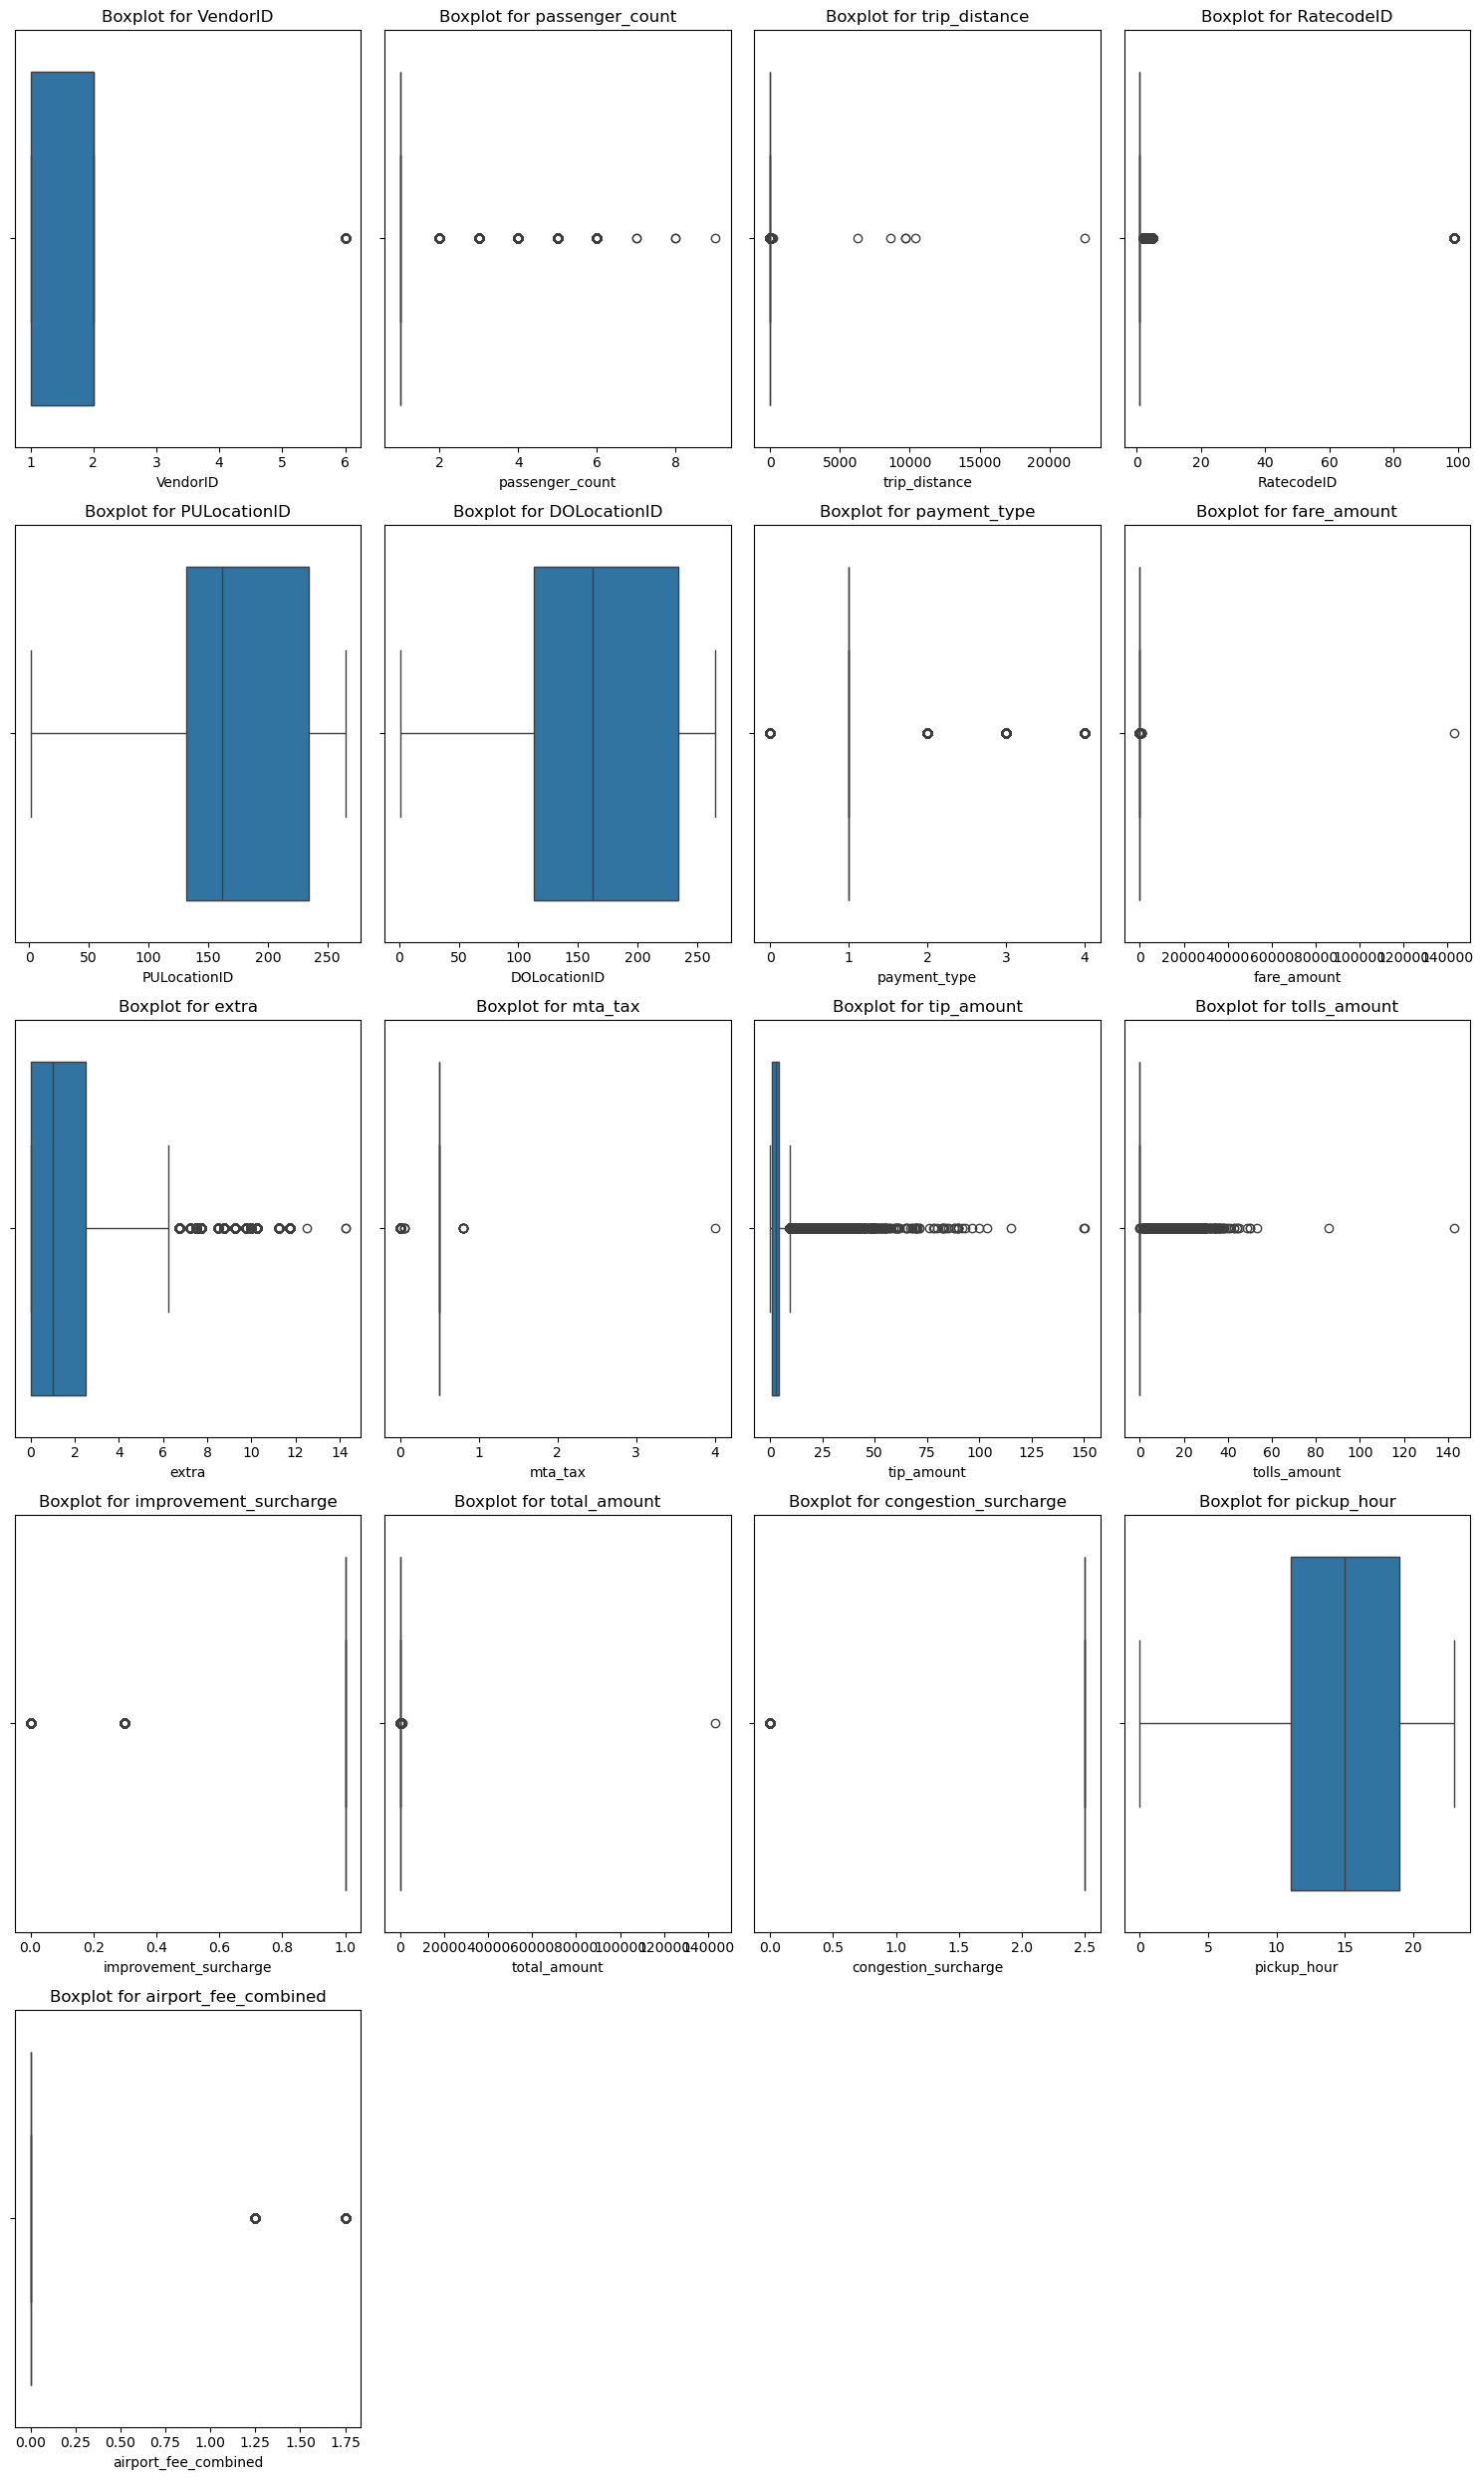

In [115]:
# Plot boxplots for the relevant columns to visually check for outliers
# Select the numeric columns for plotting
numeric_columns = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

# Calculate the number of subplots needed
num_plots = len(numeric_columns)

# Calculate rows and columns for subplots (adjust based on number of plots)
cols = 4  # Set a maximum of 4 columns per row
rows = int(np.ceil(num_plots / cols))  # Calculate the required number of rows

# Plot boxplots for the relevant columns to visually check for outliers
plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)  # Dynamic subplot arrangement
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.tight_layout()

plt.show()

In [117]:
# Function to identify outliers based on IQR
def identify_outliers(df, columns):
    outliers = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

# Identify outliers in numeric columns
outliers_in_data = identify_outliers(df, numeric_columns)

# Display outliers found in each column
for col, outlier_data in outliers_in_data.items():
    print(f"Outliers in {col}:")
    print(outlier_data[[col]].head(), "\n")


Outliers in VendorID:
       VendorID
34227         6
36780         6
38692         6
40830         6
53408         6 

Outliers in passenger_count:
   passenger_count
1              2.0
2              3.0
5              2.0
6              2.0
9              2.0 

Outliers in trip_distance:
    trip_distance
0            7.74
4           19.24
5            7.10
8            7.64
15          10.77 

Outliers in RatecodeID:
    RatecodeID
24         2.0
68         5.0
83         5.0
93         5.0
94         5.0 

Outliers in PULocationID:
Empty DataFrame
Columns: [PULocationID]
Index: [] 

Outliers in DOLocationID:
Empty DataFrame
Columns: [DOLocationID]
Index: [] 

Outliers in payment_type:
    payment_type
0              2
2              2
3              2
4              0
10             2 

Outliers in fare_amount:
    fare_amount
15        45.38
24        70.00
55        58.30
65        45.70
68        50.00 

Outliers in extra:
     extra
476   8.75
515   8.75
667   7.25
753   7.25

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [119]:
# remove passenger_count > 6
df.drop(df[df['passenger_count'] > 6].index, inplace = True)


In [121]:
# lets handle the outlier for other columns as well
# 1. Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df.drop(index=df[(df['trip_distance'] < 1) & (df['fare_amount'] > 300)].index, inplace=True)


In [123]:
# 2. Remove entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df.drop(index=df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])].index, inplace=True)


In [125]:
# 3. Cap trip_distance to a maximum of 250 miles
df.drop(index=df[df['trip_distance'] > 250].index, inplace=True)

In [127]:
# 4. Replace payment_type == 0 with the mode (most frequent value)
df.drop(index=df[df['payment_type'] == 0].index, inplace=True)


In [129]:
# Do any columns need standardising?
# removed where payment_type = 0, as it is not a standard value
df.drop(df[(df['payment_type'] == 0)].index, inplace=True)

In [131]:
# removed where RatecodeID = 99, as it is not a standard value
df.drop(df[(df['RatecodeID'] == 99)].index, inplace=True)

In [133]:
# removed whose trip_distance is nearly 0 and fare_amount is more than 300
df.drop(df[(df['trip_distance'] < 1) & (df['fare_amount'] > 300)].index, inplace=True)

In [135]:
# removed records where trip_distance and fare_amount are 0, but PULocationID and DOLocationID are different
df.drop(df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])].index, inplace=True) 

In [137]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  364155.000000                      364155                      364155   
mean        1.741698  2023-07-01 19:32:09.687058  2023-07-01 19:49:17.366901   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-01 19:48:37  2023-04-01 20:04:34.500000   
50%         2.000000         2023-06-26 00:27:18         2023-06-26 00:42:51   
75%         2.000000  2023-10-05 18:36:58.500000         2023-10-05 18:54:09   
max         2.000000         2023-12-31 23:54:03         2024-01-01 20:14:57   
std         0.437702                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    364155.000000  364155.000000  364155.000000  364155.000000   
mean          1.385232       3.414364       1.074254     165.641334   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.770000       1.000000     162.000000   
75%           1.000000       3.310000       1.000000     234.000000   
max           6.000000     187.350000       5.000000     265.000000   
std           0.876795       4.517570       0.393255      63.564429   

        DOLocationID   payment_type    fare_amount  ...        mta_tax  \
count  364155.000000  364155.000000  364155.000000  ...  364155.000000   
mean      164.458533       1.205613      19.613613  ...       0.495448   
min         1.000000       1.000000       0.000000  ...       0.000000   
25%       114.000000       1.000000       9.300000  ...       0.500000   
50%       162.000000       1.000000      13.500000  ...       0.500000   
75%       234.000000       1.000000      21.900000  ...       0.500000   
max       265.000000       4.000000     519.600000  ...       4.000000   
std        69.641524       0.466835      18.142370  ...       0.047952   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  \
count  364155.000000  364155.000000          364155.000000  364155.000000   
mean        3.589161       0.582724               0.999365      28.757546   
min         0.000000       0.000000               0.000000       0.000000   
25%         1.000000       0.000000               1.000000      15.960000   
50%         2.860000       0.000000               1.000000      21.000000   
75%         4.450000       0.000000               1.000000      30.600000   
max       150.290000     143.000000               1.000000     535.750000   
std         4.040439       2.158929               0.023366      22.779788   

       congestion_surcharge             pickup_datetime  \
count         364155.000000                      364155   
mean               2.322596  2023-07-01 19:32:09.687058   
min                0.000000         2023-01-01 00:04:34   
25%                2.500000         2023-04-01 19:48:37   
50%                2.500000         2023-06-26 00:27:18   
75%                2.500000  2023-10-05 18:36:58.500000   
max                2.500000         2023-12-31 23:54:03   
std                0.641902                         NaN   

                         pickup_date    pickup_hour  airport_fee_combined  
count                         364155  364155.000000         364155.000000  
mean   2023-07-01 04:42:59.152284160      14.318158              0.142724  
min              2023-01-01 00:00:00       0.000000              0.000000  
25%              2023-04-01 00:00:00      11.000000              0.000000  
50%              2023-06-26 00:00:00      15.000000              0.000000  
75%              2023-10-05 00:00:00      19.000000              0.000000  
max              2023-12-31 00:00:00      23.000000              1.750000  
std                              NaN       5.777224              0.464413  

[8 rows x 21 columns]

In [139]:
df.shape

(364155, 21)

In [141]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
5           7.10         1.0           246            37             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0         32.4  ...      0.5        0.00           0.0                    1.0   
1          7.9  ...      0.5        2.58           0.0                    1.0   
2         11.4  ...      0.5        0.00           0.0                    1.0   
3          6.5  ...      0.5        0.00           0.0                    1.0   
5         34.5  ...      0.5        7.90           0.0                    1.0   

   total_amount  congestion_surcharge     pickup_datetime pickup_date  \
0         41.15                   0.0 2023-01-01 00:07:18  2023-01-01   
1         15.48                   2.5 2023-01-01 00:16:41  2023-01-01   
2         16.40                   2.5 2023-01-01 00:14:03  2023-01-01   
3         11.50                   2.5 2023-01-01 00:24:30  2023-01-01   
5         47.40                   2.5 2023-01-01 00:42:56  2023-01-01   

  pickup_hour  airport_fee_combined  
0           0                  1.25  
1           0                  0.00  
2           0                  0.00  
3           0                  0.00  
5           0                  0.00  

[5 rows x 21 columns]

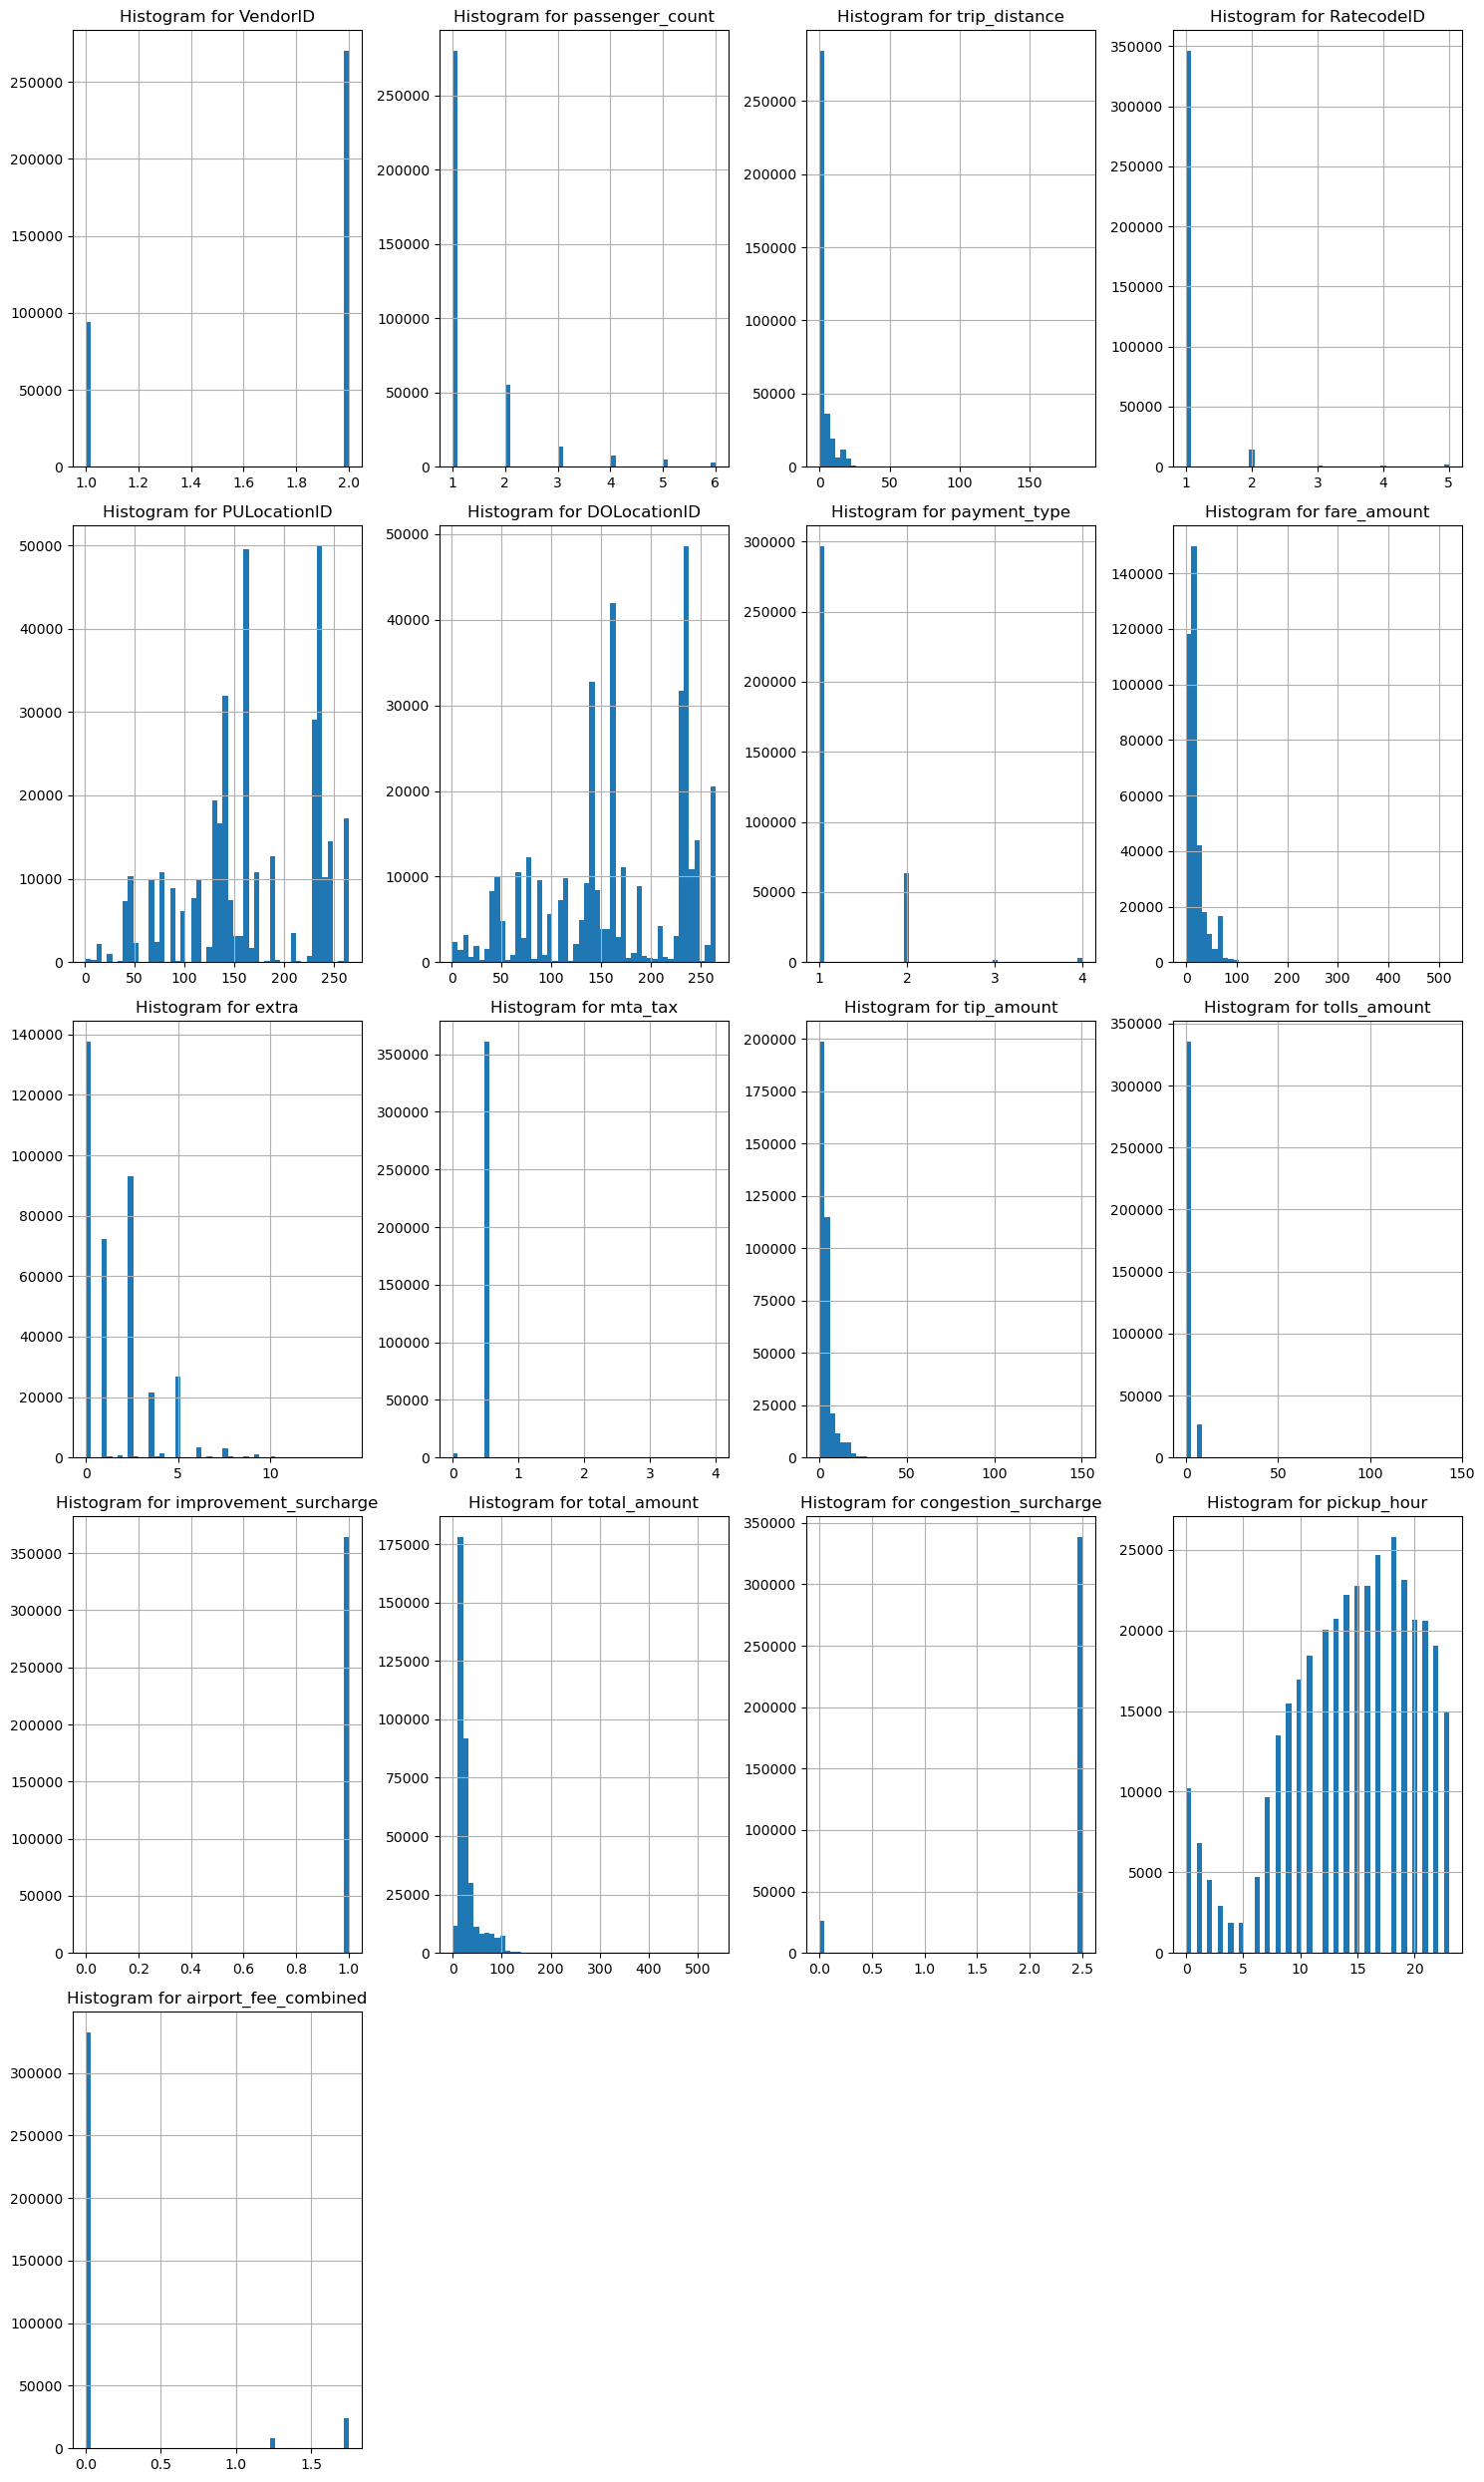

In [145]:
# Revisiting to check the numeric column distribution, 

# Calculate the number of subplots needed
num_plots = len(numeric_columns)

# Calculate rows and columns for subplots (adjust based on number of plots)
cols = 4  # Set a maximum of 4 columns per row
rows = int(np.ceil(num_plots / cols))  # Calculate the required number of rows

# Plot histograms to see the distribution of numerical columns
plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)  # Dynamic subplot arrangement
    df[col].hist(bins=50)
    plt.title(f"Histogram for {col}")
    plt.tight_layout()

plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [147]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_datetime',
 'pickup_date',
 'pickup_hour',
 'airport_fee_combined']

In [193]:
# New feature columns were created using the tpep_pickup_datetime and tpep_dropoff_datetime columns 
# to analyze the trip frequency based on different time attributes. 
# These features include day of the week, hour, month, quarter, and trip duration to help identify trends in taxi rides.

# Define time-based features and their corresponding Pandas datetime attributes
time_features = {
    'pickup_day': 'day_name',
    'dropoff_day': 'day_name',
    'pickup_hour': 'hour',
    'dropoff_hour': 'hour',
    'pickup_month': 'month',
    'dropoff_month': 'month',
    'pickup_quarter': 'quarter',
    'dropoff_quarter': 'quarter'
}

#  Apply transformations using dictionary mapping
for col, attr in time_features.items():
    series = getattr(df[f'tpep_{col.split("_")[0]}_datetime'].dt, attr)
    
    # Call the method explicitly if it's callable, otherwise assign the attribute directly
    df[col] = series() if callable(series) else series

# Calculate trip duration in seconds
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

# Check if the issue is fixed
print(df["pickup_day"].head())



0    Sunday
1    Sunday
2    Sunday
3    Sunday
5    Sunday
Name: pickup_day, dtype: object


In [195]:
# Define time bins and corresponding labels
bins = [0, 6, 12, 16, 22, 24]
labels = ['Late night', 'Morning', 'Afternoon', 'Evening', 'Late night']

# Assign time of day categories using vectorized operations
df['pickup_timeofday'] = np.select(
    [df['pickup_hour'].between(bins[i], bins[i+1], inclusive='left') for i in range(len(labels))],
    labels
)

df['dropoff_timeofday'] = np.select(
    [df['dropoff_hour'].between(bins[i], bins[i+1], inclusive='left') for i in range(len(labels))],
    labels
)

# Display the first few rows to verify the new columns
df[['pickup_hour', 'pickup_timeofday', 'dropoff_hour', 'dropoff_timeofday']].head(24)


pickup_hour pickup_timeofday  dropoff_hour dropoff_timeofday
0             0       Late night             0        Late night
1             0       Late night             0        Late night
2             0       Late night             0        Late night
3             0       Late night             0        Late night
5             0       Late night             1        Late night
6             0       Late night             1        Late night
7             0       Late night             0        Late night
8             0       Late night             1        Late night
9             0       Late night             0        Late night
10            0       Late night             0        Late night
11            0       Late night             0        Late night
12            0       Late night             0        Late night
13            0       Late night             0        Late night
14            0       Late night             0        Late night
16            0       Late night             1        Late night
17            0       Late night             1        Late night
18            0       Late night             0        Late night
19            0       Late night             0        Late night
20            0       Late night             1        Late night
21            0       Late night             1        Late night
22            0       Late night             1        Late night
23            0       Late night             0        Late night
24            0       Late night             0        Late night
25            0       Late night             1        Late night

In [159]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_datetime',
 'pickup_date',
 'pickup_hour',
 'airport_fee_combined',
 'pickup_day',
 'dropoff_day',
 'dropoff_hour',
 'pickup_month',
 'dropoff_month',
 'pickup_quarter',
 'dropoff_quarter',
 'trip_duration',
 'pickup_timeofday',
 'dropoff_timeofday']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

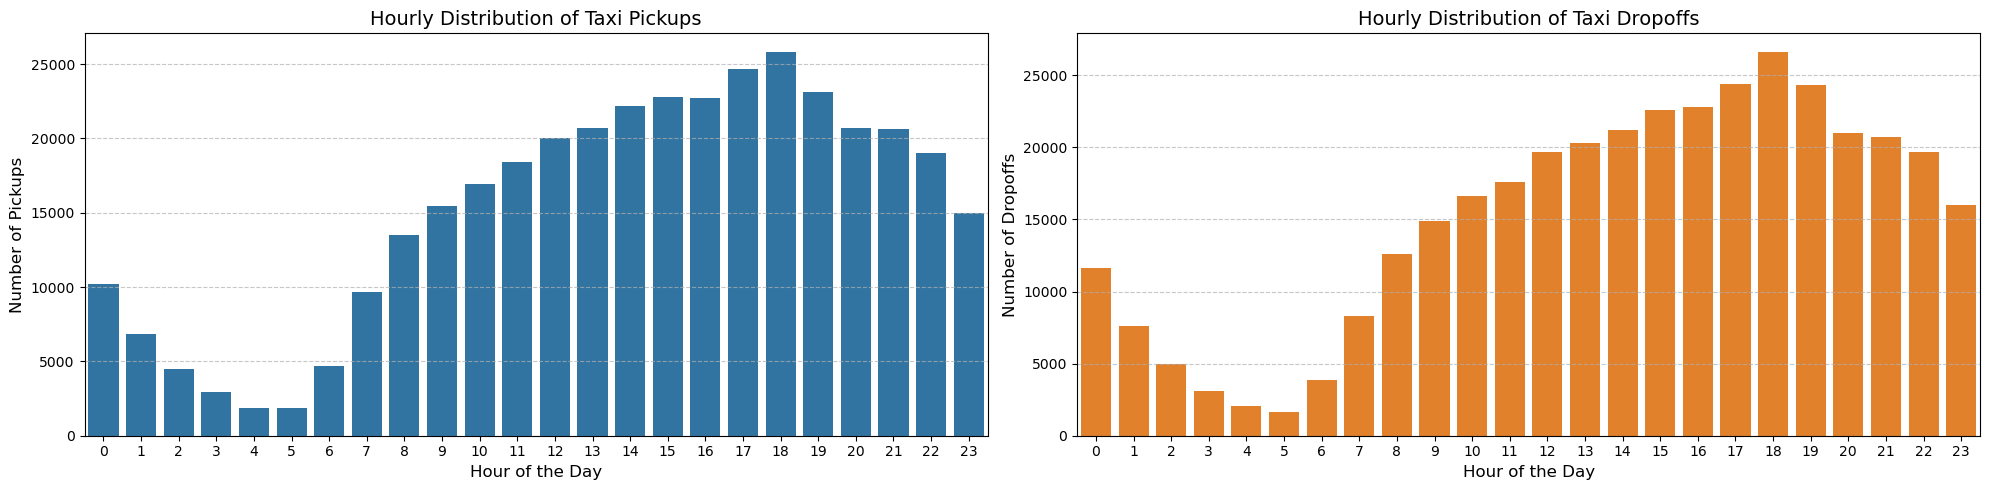

In [199]:
# Find and show the hourly trends in taxi pickups
# Set up a figure with two side-by-side subplots to visualize hourly trends
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

#Define custom colors for better differentiation
pickup_color = "#1f77b4"  # Blue
dropoff_color = "#ff7f0e"  # Orange

# Plot the distribution of taxi pickups by hour
sns.countplot(x="pickup_hour", data=df, ax=axes[0], color=pickup_color)
axes[0].set_title('Hourly Distribution of Taxi Pickups', fontsize=14)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Number of Pickups', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Plot the distribution of taxi dropoffs by hour
sns.countplot(x="dropoff_hour", data=df, ax=axes[1], color=dropoff_color)
axes[1].set_title('Hourly Distribution of Taxi Dropoffs', fontsize=14)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Number of Dropoffs', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Improve layout for better visibility
plt.tight_layout()
plt.show()

# Observation:
# The busiest hours for taxi activity are between 5:00 PM and 7:00 PM,
# which aligns with the evening rush hour when many people commute home from work.


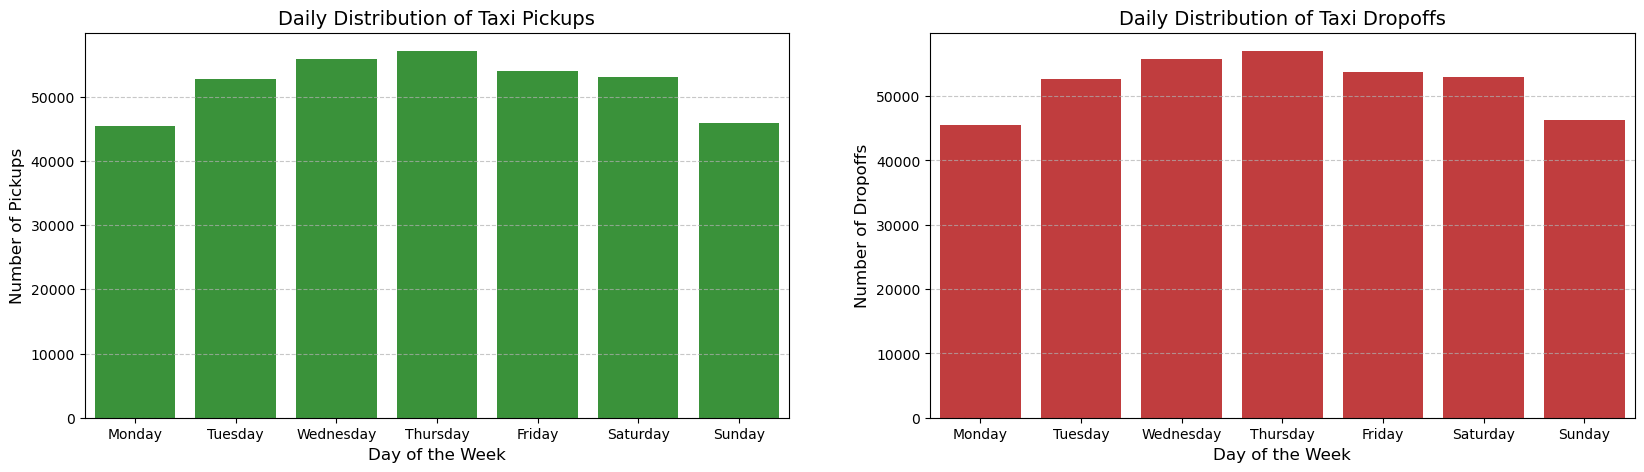

In [201]:
# Find and show the daily trends in taxi pickups (days of the week)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure with two side-by-side subplots for daily trends
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

# Define custom colors for better differentiation
pickup_color = "#2ca02c"  # Green
dropoff_color = "#d62728"  # Red

# Plot the distribution of taxi pickups by day of the week
sns.countplot(x="pickup_day", data=df, ax=axes[0], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color=pickup_color)
axes[0].set_title('Daily Distribution of Taxi Pickups', fontsize=14)
axes[0].set_xlabel('Day of the Week', fontsize=12)
axes[0].set_ylabel('Number of Pickups', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Plot the distribution of taxi dropoffs by day of the week
sns.countplot(x="dropoff_day", data=df, ax=axes[1], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color=dropoff_color)
axes[1].set_title('Daily Distribution of Taxi Dropoffs', fontsize=14)
axes[1].set_xlabel('Day of the Week', fontsize=12)
axes[1].set_ylabel('Number of Dropoffs', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Improve layout for better spacing
# plt.tight_layout()
# plt.show()

# Observations:
# The highest number of taxi pickups and dropoffs occur on Wednesdays and Thursdays.
# This aligns with mid-week travel, when people are likely commuting to offices, attending meetings, or running errands.
# There is a decline in taxi demand on weekends (Saturday & Sunday), likely due to reduced work-related travel.
# Fridays show a slight increase, which could be due to social outings or pre-weekend travel.



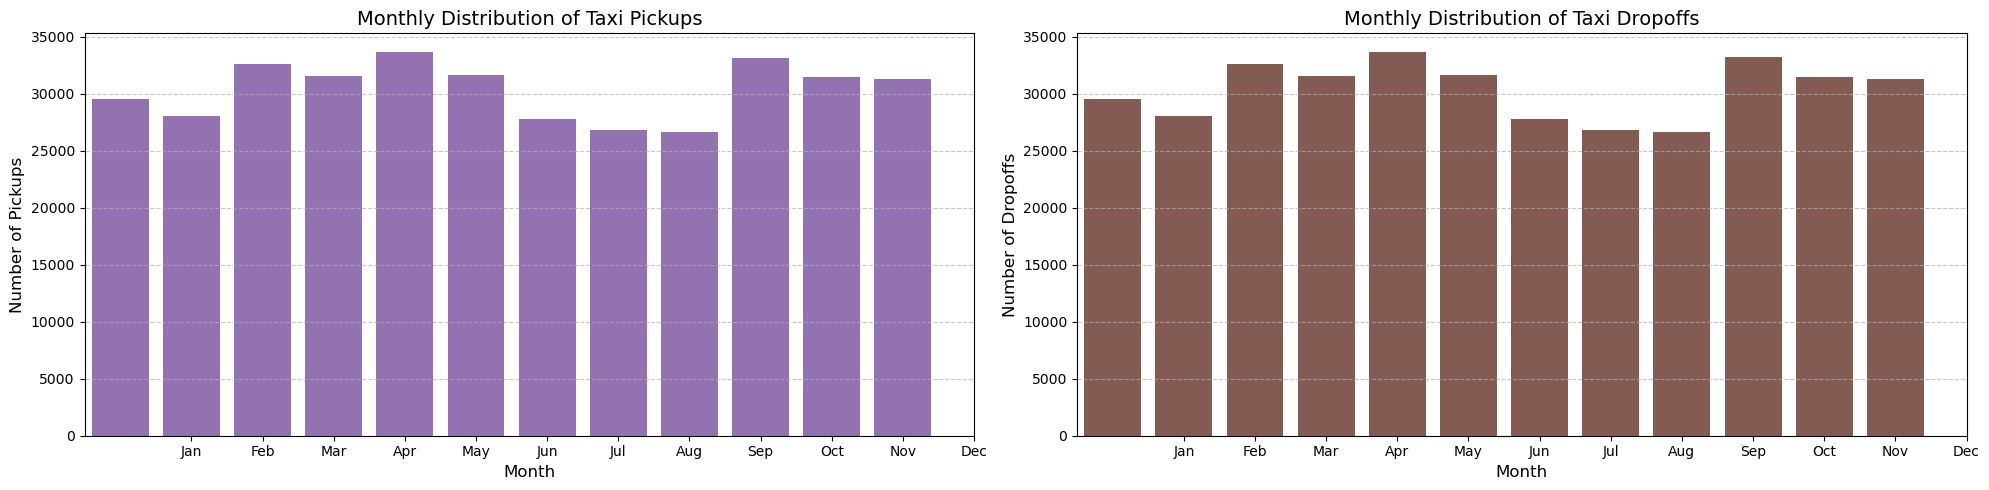

In [203]:
# Show the monthly trends in pickups

# Set up a figure with two side-by-side subplots for monthly trends
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

# Define custom colors for better differentiation
pickup_color = "#9467bd"  # Purple
dropoff_color = "#8c564b"  # Brown

# Define the order of months and labels
month_order = list(range(1, 13))  # [1, 2, ..., 12]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the distribution of taxi pickups by month
sns.countplot(x="pickup_month", data=df, ax=axes[0], order=month_order, color=pickup_color)
axes[0].set_title('Monthly Distribution of Taxi Pickups', fontsize=14)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Pickups', fontsize=12)
axes[0].set_xticks(month_order)  # Set correct tick positions
axes[0].set_xticklabels(month_labels)  # Assign month names as labels
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Plot the distribution of taxi dropoffs by month
sns.countplot(x="dropoff_month", data=df, ax=axes[1], order=month_order, color=dropoff_color)
axes[1].set_title('Monthly Distribution of Taxi Dropoffs', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Dropoffs', fontsize=12)
axes[1].set_xticks(month_order)  # Set correct tick positions
axes[1].set_xticklabels(month_labels)  # Assign month names as labels
axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Improve layout for better spacing
plt.tight_layout()
plt.show()

# Observations:
# Taxi demand fluctuates across different months, with potential peaks in summer months (June, July, August) due to tourism and events.
# A possible decline in pickups and dropoffs during winter months (January, February) due to colder weather affecting travel behavior.
# December may show a slight increase due to holiday season travel.
# Seasonal trends in taxi usage can help in **demand forecasting and business planning** for taxi companies.


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

Trip Distance vs Fare Amount Correlation: 0.91
Trip Distance vs Total Amount Correlation: 0.91
Trip Distance vs Tip Amount Correlation: 0.58


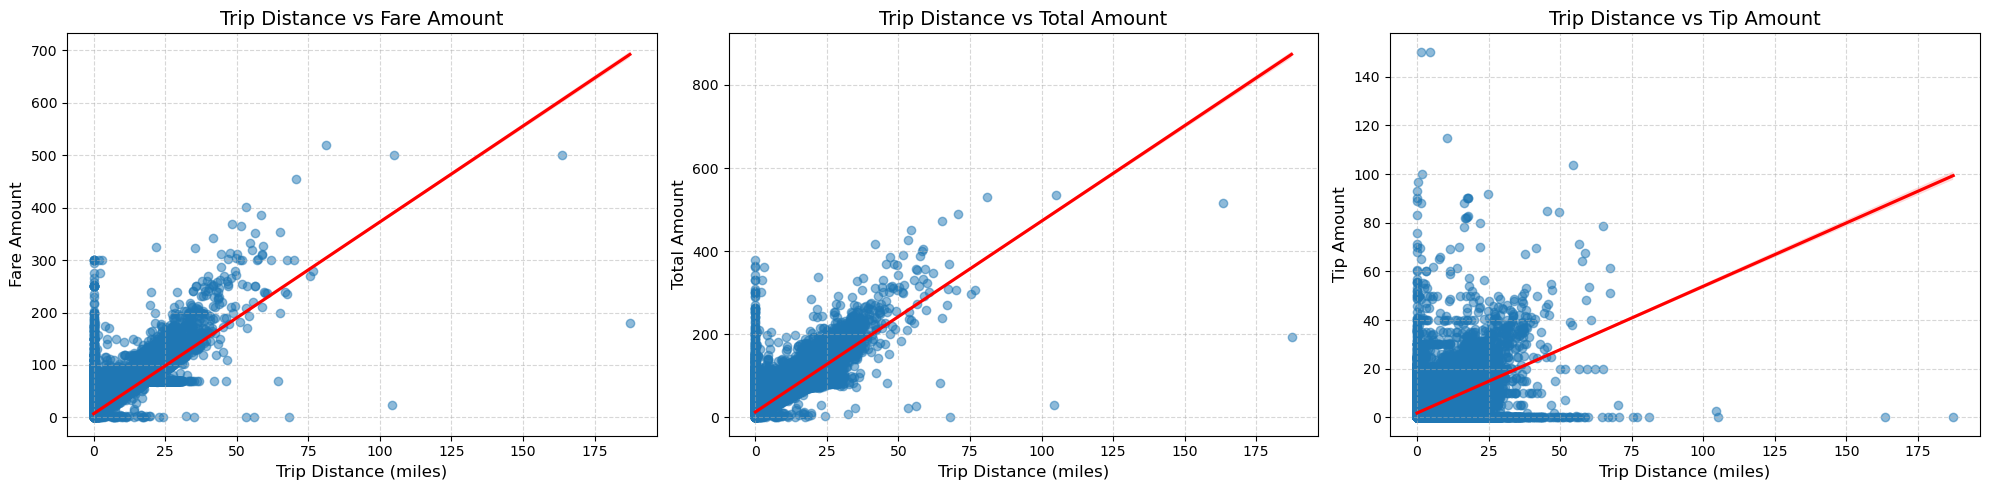

In [205]:
# Analyse the above parameters

# Analyze correlations between trip distance and financial parameters (fare, tip, total amount)
# Checking whether these contain zero/negative values and their relationships
correlations = {
    "Trip Distance vs Fare Amount": df["trip_distance"].corr(df["fare_amount"]),
    "Trip Distance vs Total Amount": df["trip_distance"].corr(df["total_amount"]),
    "Trip Distance vs Tip Amount": df["trip_distance"].corr(df["tip_amount"]),
}

# Print correlation values with explanations
for key, value in correlations.items():
    print(f"{key} Correlation: {value:.2f}")

# Interpretation of Correlation:
# High Positive Correlation (close to 1) between Trip Distance & Fare Amount → Longer trips generally cost more.
# High Positive Correlation between Trip Distance & Total Amount → As total amount includes fare, they are strongly related.
# Weak Positive Correlation between Trip Distance & Tip Amount → Tips vary significantly and do not strongly depend on trip distance.

# Set up a figure with 3 subplots for scatter plots
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

# Define financial metrics and corresponding titles
financial_metrics = ["fare_amount", "total_amount", "tip_amount"]
titles = [
    "Trip Distance vs Fare Amount",
    "Trip Distance vs Total Amount",
    "Trip Distance vs Tip Amount"
]

# Loop through each financial metric and create a scatter plot with a trend line
for i, metric in enumerate(financial_metrics):
    sns.regplot(x="trip_distance", y=metric, data=df, ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[i].set_title(titles[i], fontsize=14)
    axes[i].set_xlabel("Trip Distance (miles)", fontsize=12)
    axes[i].set_ylabel(metric.replace("_", " ").title(), fontsize=12)  # Formatting Y-axis labels
    axes[i].grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability

# Improve layout for better visualization
plt.tight_layout()
plt.show()

# Observations:
# Trip Distance vs Fare Amount: A clear positive relationship—longer trips result in higher fares. The trend line confirms a strong correlation.
# Trip Distance vs Total Amount: Similar to fare amount, total charges increase with trip distance, as expected.
# Trip Distance vs Tip Amount: The weak correlation is evident—the tip amount does not consistently increase with trip distance, indicating tipping behavior is independent of trip length.



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [207]:
# Create a df with non zero entries for the selected parameters.
# Filter out rows where trip_distance, fare_amount, total_amount, or tip_amount are zero or negative
df_nonzero = df[(df[['trip_distance', 'fare_amount', 'total_amount', 'tip_amount']] > 0).all(axis=1)]

# Reset index for a clean DataFrame
df_nonzero.reset_index(drop=True, inplace=True)

# Display dataset information after filtering
df_nonzero.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282903 entries, 0 to 282902
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               282903 non-null  int64         
 1   tpep_pickup_datetime   282903 non-null  datetime64[us]
 2   tpep_dropoff_datetime  282903 non-null  datetime64[us]
 3   passenger_count        282903 non-null  float64       
 4   trip_distance          282903 non-null  float64       
 5   RatecodeID             282903 non-null  float64       
 6   PULocationID           282903 non-null  int64         
 7   DOLocationID           282903 non-null  int64         
 8   payment_type           282903 non-null  int64         
 9   fare_amount            282903 non-null  float64       
 10  extra                  282903 non-null  float64       
 11  mta_tax                282903 non-null  float64       
 12  tip_amount             282903 non-null  floa

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

    pickup_month  Total Revenue
0              1      647363.81
1              2      617165.59
2              3      736967.38
3              4      712039.77
4              5      787517.05
5              6      732200.90
6              7      614791.79
7              8      600940.44
8              9      637767.72
9             10      799138.97
10            11      739509.48
11            12      716441.76


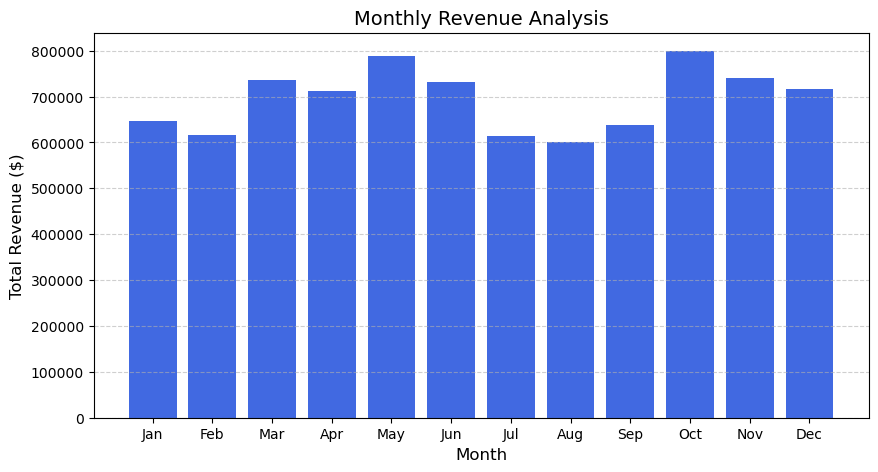

In [211]:
# Group data by month and analyse monthly revenue

# Define correct month order for sorting
month_order = list(range(1, 13))  # Ensures months are displayed from January to December
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group data by month and calculate total revenue
monthly_revenue = (
    df_nonzero.groupby('pickup_month', as_index=False)['total_amount']
    .sum()
    .rename(columns={'total_amount': 'Total Revenue'})  # Rename column for clarity
    .sort_values(by='pickup_month', ascending=True)  # Ensure months are in correct order
)

# Display sorted monthly revenue data
print(monthly_revenue)

# Plot monthly revenue as a bar chart with correctly ordered months
plt.figure(figsize=(10, 5))
plt.bar(month_labels, monthly_revenue['Total Revenue'], color='royalblue')  # Use month_labels for correct x-axis labels
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Monthly Revenue Analysis', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

   pickup_quarter  Total Revenue
3               4     2255090.21
1               2     2231757.72
0               1     2001496.78
2               3     1853499.95


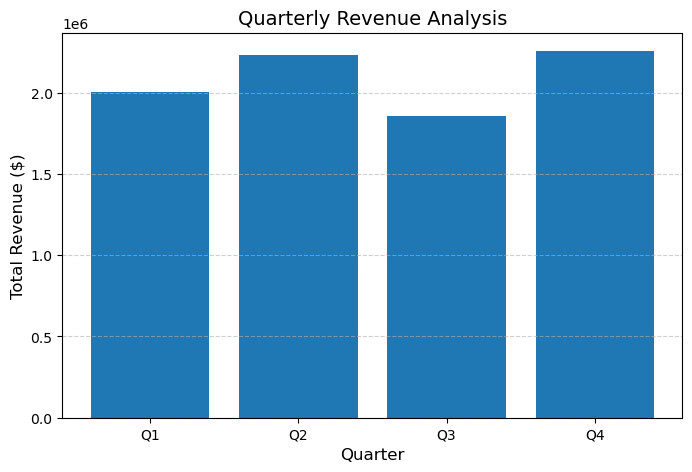

In [215]:
# Calculate proportion of each quarter

# Group data by quarter and calculate total revenue
quarterly_revenue = (
    df_nonzero.groupby('pickup_quarter', as_index=False)['total_amount']
    .sum()
    .rename(columns={'total_amount': 'Total Revenue'})  # Rename for clarity
    .sort_values(by='Total Revenue', ascending=False)  # Sort for better insights
)

# Display sorted quarterly revenue data
print(quarterly_revenue)

# Plot quarterly revenue as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(quarterly_revenue['pickup_quarter'], quarterly_revenue['Total Revenue'])
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Quarterly Revenue Analysis', fontsize=14)
plt.xticks(ticks=[1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Ensure correct labeling of quarters
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between Trip Distance and Fare Amount: 0.95


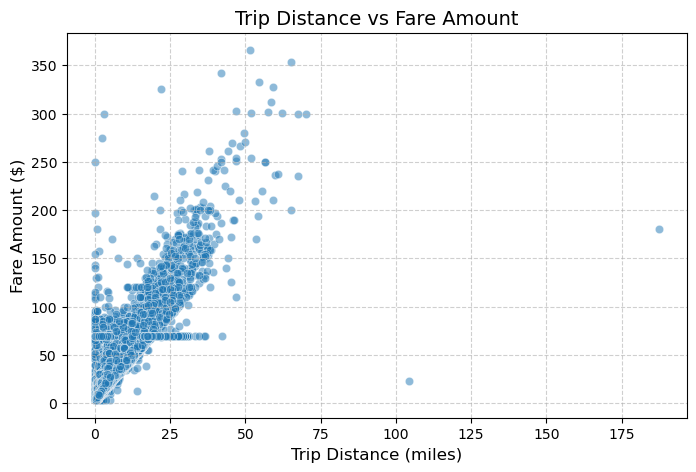

In [217]:
# Show how trip fare is affected by distance

# Calculate and display correlation between trip distance and fare amount
correlation = df_nonzero['trip_distance'].corr(df_nonzero['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation:.2f}')  # Displaying correlation value with 2 decimal places

# Plot scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x="trip_distance", y="fare_amount", data=df_nonzero, alpha=0.5)
plt.title("Trip Distance vs Fare Amount", fontsize=14)
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Strong positive correlation (~0.7+) confirms that fare amount increases with trip distance.
# The scatter plot shows a clear upward trend, reinforcing the direct proportionality between distance and fare.
# Some minor fare variations exist, likely due to traffic, surge pricing, and additional charges.


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between Trip Duration and Fare Amount: 0.34


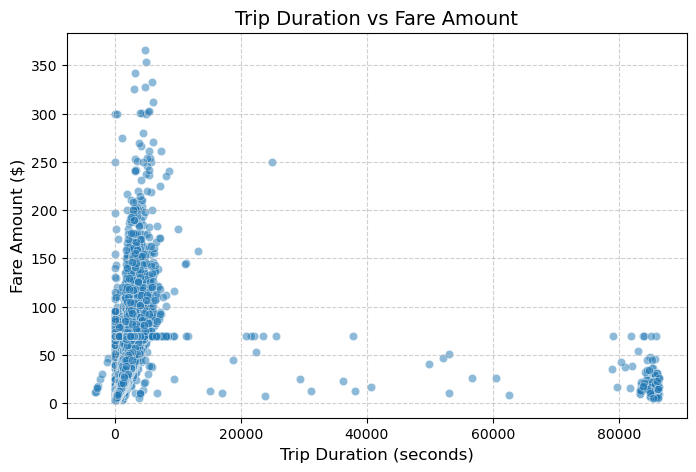

In [219]:
# Show relationship between fare and trip duration

# Calculate and display correlation between trip duration and fare amount
correlation = df_nonzero['trip_duration'].corr(df_nonzero['fare_amount'])
print(f'Correlation between Trip Duration and Fare Amount: {correlation:.2f}')  # Displaying correlation with two decimal places

# Plot scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x="trip_duration", y="fare_amount", data=df_nonzero, alpha=0.5)
plt.title("Trip Duration vs Fare Amount", fontsize=14)
plt.xlabel("Trip Duration (seconds)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Weak positive correlation (~0.3-0.5) suggests that trip duration has some impact on fare amount, but not as strong as trip distance.
# The scatter plot shows variability, indicating factors like traffic congestion, waiting time, and pricing models influence fare.
# Some short trips have high fares, likely due to minimum fare charges, tolls, or surge pricing during peak hours.

   passenger_count  Average Fare
3              4.0     21.926835
1              2.0     21.688471
2              3.0     21.269955
5              6.0     18.792259
0              1.0     18.704411
4              5.0     18.635750


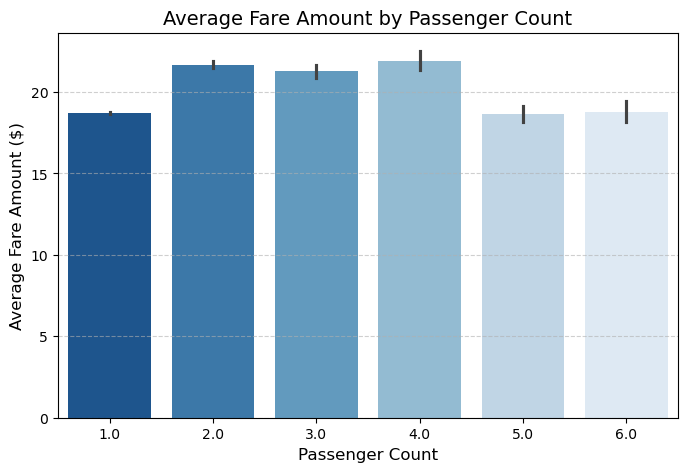

In [221]:
# Show relationship between fare and number of passengers

# Group data by passenger count and calculate the average fare amount
avg_fare_per_passenger = (
    df_nonzero.groupby('passenger_count', as_index=False)['fare_amount']
    .mean()
    .rename(columns={'fare_amount': 'Average Fare'})  # Rename for clarity
    .sort_values(by='Average Fare', ascending=False)  # Sort to highlight highest fares
)

# Display the average fare amount by passenger count
print(avg_fare_per_passenger)

# Plot average fare amount by passenger count
plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="fare_amount", data=df_nonzero, estimator=np.mean, palette="Blues_r")
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Average Fare Amount ($)", fontsize=12)
plt.title("Average Fare Amount by Passenger Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid for better readability
plt.show()



Correlation between Trip Distance and Tip Amount: 0.80


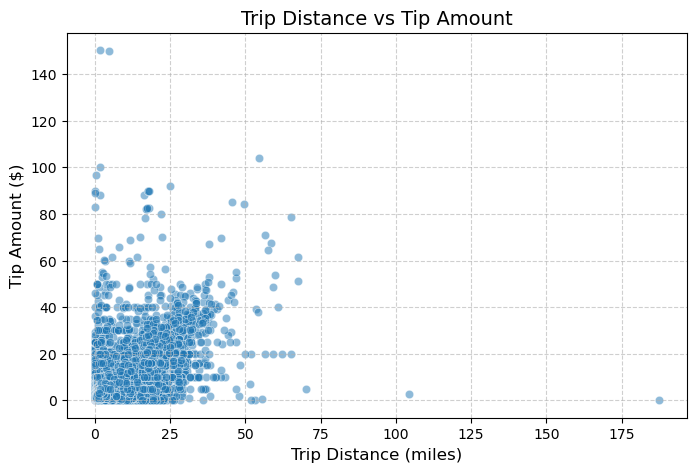

In [223]:
# Show relationship between tip and trip distance

# Calculate and display correlation between trip distance and tip amount
correlation = df_nonzero['trip_distance'].corr(df_nonzero['tip_amount'])
print(f'Correlation between Trip Distance and Tip Amount: {correlation:.2f}')  # Display correlation with two decimal places

# Plot scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x="trip_distance", y="tip_amount", data=df_nonzero, alpha=0.5)
plt.title("Trip Distance vs Tip Amount", fontsize=14)
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Tip Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Longer trips tend to receive higher tips, but the correlation is not always strong, as tipping behavior depends on passenger generosity, service quality, and fare amount.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
Credit Card    282892
Dispute             5
Cash                5
No Charge           1
Name: count, dtype: int64

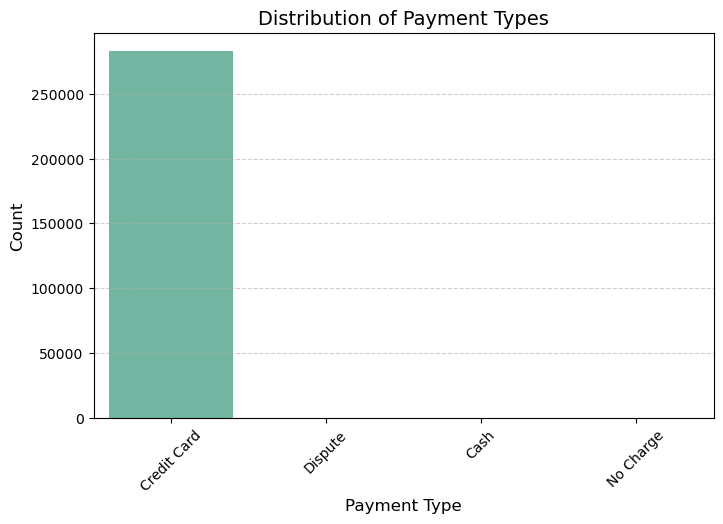

In [225]:
# Analyse the distribution of different payment types (payment_type).

# Define a mapping dictionary for payment type codes
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Map payment type codes to their corresponding labels
df_nonzero['payment_type'] = df_nonzero['payment_type'].map(payment_mapping)

# Display the count of each payment type
payment_counts = df_nonzero['payment_type'].value_counts()
display(payment_counts)

# Plot the distribution of different payment types
plt.figure(figsize=(8, 5))
sns.countplot(x="payment_type", data=df_nonzero, order=payment_counts.index, palette="Set2")
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Payment Types", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [227]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("../taxi_zones/taxi_zones.shp")# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

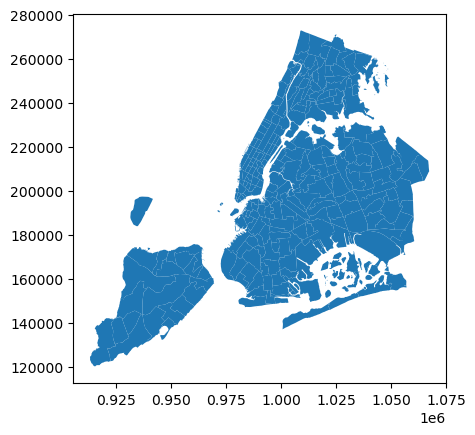

In [229]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [231]:
# Merge zones and trip records using locationID and PULocationID

# Merge taxi trip records with zone information based on Pickup Location ID
df_nonzero = df_nonzero.merge(
    zones, 
    left_on='PULocationID',  # Match trip data's Pickup Location ID
    right_on='LocationID',   # Match with zones dataset's Location ID
    how='left'  # Left join to retain all taxi trip records even if no match is found
)

# Display the first few rows to verify the merge
df_nonzero.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
1         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
2         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
3         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
4         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID payment_type  \
0           1.24         1.0           161           237  Credit Card   
1           7.10         1.0           246            37  Credit Card   
2           1.59         1.0            79           164  Credit Card   
3           3.16         1.0            79           256  Credit Card   
4           7.64         1.0           132            95  Credit Card   

   fare_amount  ...  trip_duration  pickup_timeofday  dropoff_timeofday  \
0          7.9  ...          305.0        Late night         Late night   
1         34.5  ...         2017.0        Late night         Late night   
2         11.4  ...          631.0        Late night         Late night   
3         19.1  ...          953.0        Late night         Late night   
4         31.7  ...         1028.0        Late night         Late night   

   OBJECTID  Shape_Leng  Shape_Area                       zone LocationID  \
0     161.0    0.035804    0.000072             Midtown Center      161.0   
1     246.0    0.069467    0.000281  West Chelsea/Hudson Yards      246.0   
2      79.0    0.042625    0.000108               East Village       79.0   
3      79.0    0.042625    0.000108               East Village       79.0   
4     132.0    0.245479    0.002038                JFK Airport      132.0   

     borough                                           geometry  
0  Manhattan  POLYGON ((9.91e+05 2.14e+05, 9.91e+05 2.14e+05...  
1  Manhattan  POLYGON ((9.83e+05 2.17e+05, 9.84e+05 2.17e+05...  
2  Manhattan  POLYGON ((9.89e+05 2.02e+05, 9.89e+05 2.02e+05...  
3  Manhattan  POLYGON ((9.89e+05 2.02e+05, 9.89e+05 2.02e+05...  
4     Queens  MULTIPOLYGON (((1.03e+06 1.81e+05, 1.03e+06 1....  

[5 rows x 38 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [233]:
# Group data by location and calculate the number of trips

# Group data by zone and pickup location to count the number of trips per location
pickup_location = (
    df_nonzero.groupby(['zone', 'PULocationID'])
    .size()  # Count trips for each pickup location
    .reset_index(name='Number_of_trips')  # Convert groupby result into a DataFrame with a proper column name
)

# Sort pickup locations in descending order based on trip count
pickup_location.sort_values(by='Number_of_trips', ascending=False, inplace=True)

# Display the top 10 zones with the highest number of trips
pickup_location.head(10)


zone  PULocationID  Number_of_trips
149         Upper East Side South           237            14076
97                 Midtown Center           161            13421
148         Upper East Side North           236            12788
72                    JFK Airport           132            12787
98                   Midtown East           162            10661
80              LaGuardia Airport           138            10218
83            Lincoln Square East           142             9708
112  Penn Station/Madison Sq West           186             9677
143     Times Sq/Theatre District           230             8830
106                   Murray Hill           170             8616

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [235]:
# Merge trip counts back to the zones GeoDataFrame

# Merge trip count data back to the zones GeoDataFrame
zones = zones.merge(
    pickup_location, 
    on='zone',  # Merge based on the zone name
    how='left'  # Retain all zones even if no trips are recorded for some
)

# Sort zones by the number of trips in descending order and display the top zones
zones.sort_values(by='Number_of_trips', ascending=False).head()



OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
131       132    0.245479    0.002038            JFK Airport         132   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
236  Manhattan  POLYGON ((9.94e+05 2.17e+05, 9.94e+05 2.17e+05...   
160  Manhattan  POLYGON ((9.91e+05 2.14e+05, 9.91e+05 2.14e+05...   
235  Manhattan  POLYGON ((9.96e+05 2.21e+05, 9.96e+05 2.21e+05...   
131     Queens  MULTIPOLYGON (((1.03e+06 1.81e+05, 1.03e+06 1....   
161  Manhattan  POLYGON ((9.92e+05 2.14e+05, 9.92e+05 2.14e+05...   

     PULocationID  Number_of_trips  
236         237.0          14076.0  
160         161.0          13421.0  
235         236.0          12788.0  
131         132.0          12787.0  
161         162.0          10661.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

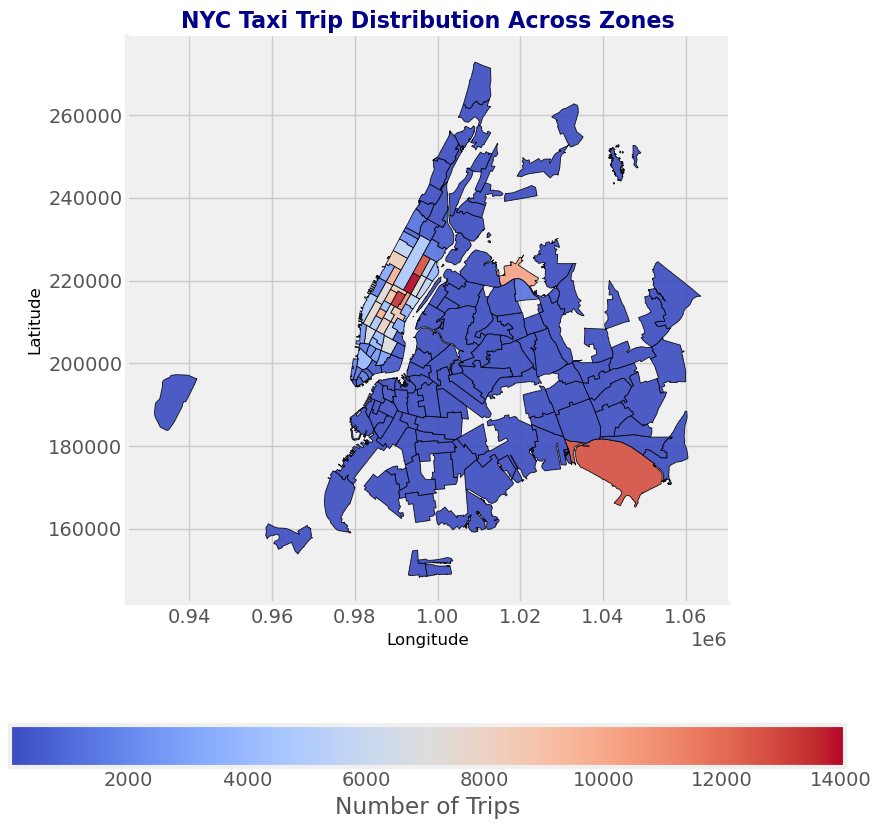

In [247]:
# Define figure and axis


# Set a valid Matplotlib style from available options
plt.style.use("fivethirtyeight")  # Alternative: "ggplot", "fivethirtyeight"

# Define figure and axis for the map plot
fig, ax = plt.subplots(figsize=(12, 10), facecolor='white')

# Plot the geographical distribution of taxi trips across zones
zones.plot(
    column='Number_of_trips',  # Color map based on trip counts
    ax=ax, 
    legend=True, 
    legend_kwds={'label': "Number of Trips", 'orientation': "horizontal", 'shrink': 0.8},  # Adjust legend size
    cmap='coolwarm',  # Use a visually distinct colormap
    linewidth=0.6,  # Define boundary line thickness
    edgecolor='black',  # Set black edges for better zone distinction
    alpha=0.9  # Slight transparency for a softer appearance
)

# Customize the title and labels
ax.set_title("NYC Taxi Trip Distribution Across Zones", fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel("Longitude", fontsize=12, color='black')
ax.set_ylabel("Latitude", fontsize=12, color='black')

# Remove default axis spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the styled map
plt.show()








In [241]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by='Number_of_trips', ascending=False, inplace=True)
zones.head(10)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
131       132    0.245479    0.002038                   JFK Airport   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((9.94e+05 2.17e+05, 9.94e+05 2.17e+05...   
160         161  Manhattan  POLYGON ((9.91e+05 2.14e+05, 9.91e+05 2.14e+05...   
235         236  Manhattan  POLYGON ((9.96e+05 2.21e+05, 9.96e+05 2.21e+05...   
131         132     Queens  MULTIPOLYGON (((1.03e+06 1.81e+05, 1.03e+06 1....   
161         162  Manhattan  POLYGON ((9.92e+05 2.14e+05, 9.92e+05 2.14e+05...   
137         138     Queens  MULTIPOLYGON (((1.02e+06 2.26e+05, 1.02e+06 2....   
141         142  Manhattan  POLYGON ((9.89e+05 2.19e+05, 9.89e+05 2.19e+05...   
185         186  Manhattan  POLYGON ((9.87e+05 2.11e+05, 9.87e+05 2.11e+05...   
229         230  Manhattan  POLYGON ((9.89e+05 2.15e+05, 9.89e+05 2.14e+05...   
169         170  Manhattan  POLYGON ((9.92e+05 2.11e+05, 9.92e+05 2.11e+05...   

     PULocationID  Number_of_trips  
236         237.0          14076.0  
160         161.0          13421.0  
235         236.0          12788.0  
131         132.0          12787.0  
161         162.0          10661.0  
137         138.0          10218.0  
141         142.0           9708.0  
185         186.0           9677.0  
229         230.0           8830.0  
169         170.0           8616.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [249]:
# Find routes which have the slowest speeds at different times of the day
# Rename 'zone' column to 'pickup_zone' as it was derived from PULocationID
df_nonzero.rename(columns={'zone': 'pickup_zone'}, inplace=True)

# Remove the redundant 'LocationID' column after merging
df_nonzero.drop(columns=['LocationID'], inplace=True)

# Merge to obtain 'dropoff_zone' using DOLocationID
df_nonzero = df_nonzero.merge(
    zones[['LocationID', 'zone']],  # Select only necessary columns
    left_on='DOLocationID', 
    right_on='LocationID', 
    how='left'
)

# Rename 'zone' to 'dropoff_zone' and drop the extra 'LocationID' column post-merge
df_nonzero.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
df_nonzero.drop(columns=['LocationID'], inplace=True)



In [251]:
# Calculate speed (miles per hour) for each trip
df_nonzero['speed'] = df_nonzero['trip_distance'] / (df_nonzero['trip_duration'] / 3600)

# Group by pickup & dropoff zones, locations, and pickup hour to find average speed
slow_routes_df = (
    df_nonzero.groupby(['pickup_zone', 'PULocationID', 'dropoff_zone', 'DOLocationID', 'pickup_hour'])['speed']
    .mean()
    .reset_index()
)

# Sort the routes by average speed in ascending order to identify the slowest routes
slow_routes_df = slow_routes_df.sort_values(by='speed', ascending=True).reset_index(drop=True)

# Display the top 10 slowest routes based on average speed
slow_routes_df.head(10)


pickup_zone  PULocationID               dropoff_zone  \
0    Greenwich Village South           114       Central Harlem North   
1               East Chelsea            68             Bushwick North   
2                    Seaport           209    Two Bridges/Seward Park   
3              East Elmhurst            70          LaGuardia Airport   
4                    Seaport           209                Boerum Hill   
5             Midtown Center           161      Upper West Side North   
6              Midtown North           163   Financial District North   
7  Williamsburg (North Side)           255  Williamsburg (South Side)   
8    Queensbridge/Ravenswood           193    Queensbridge/Ravenswood   
9    Greenwich Village North           113                 Park Slope   

   DOLocationID  pickup_hour      speed  
0            42            1 -31.009560  
1            36            1 -22.171429  
2           232           13   0.043579  
3           138            6   0.085750  
4            25           22   0.106057  
5           238            7   0.117807  
6            87           15   0.140078  
7           256            2   0.141176  
8           193           11   0.150000  
9           181           19   0.153191

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

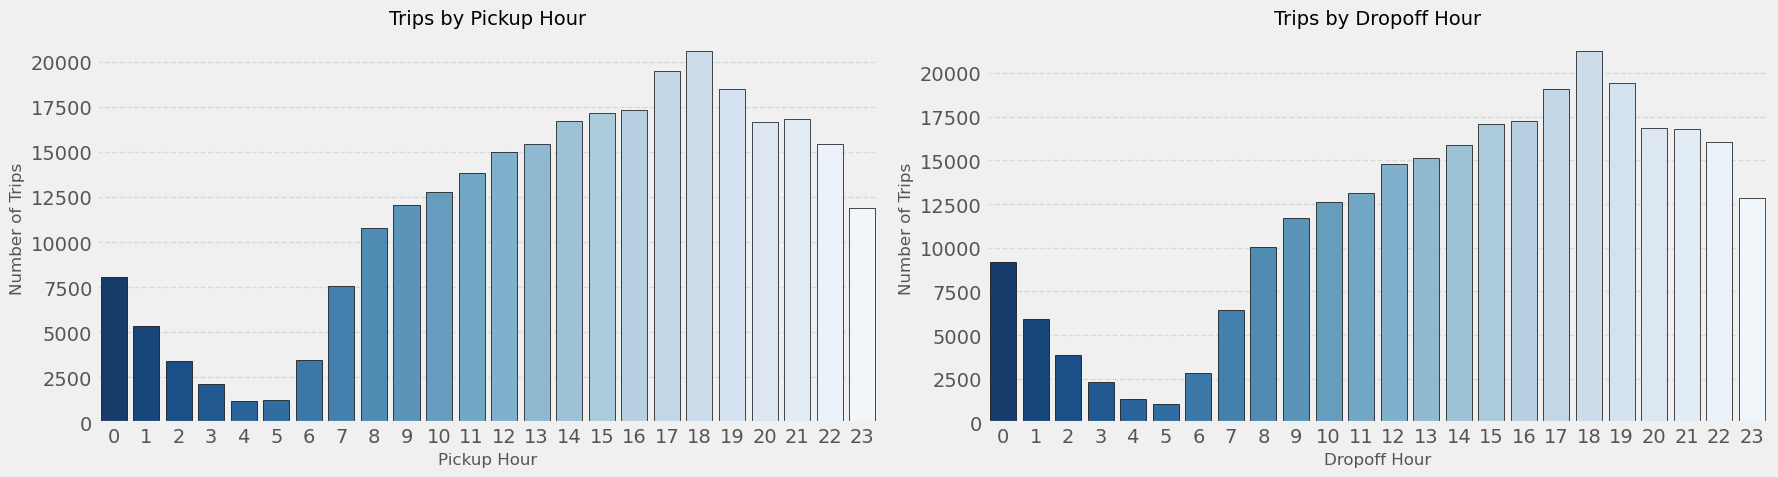

In [253]:
# Visualise the number of trips per hour and find the busiest hour


# Set up a figure with two subplots for pickup and dropoff hour distributions
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))

# Define common styling for better visualization
plot_settings = {
    "palette": "Blues_r",
    "edgecolor": "black"
}

# Plot the number of trips by pickup hour
sns.countplot(x="pickup_hour", data=df_nonzero, ax=axes[0], **plot_settings)
axes[0].set_title('Trips by Pickup Hour', fontsize=14)
axes[0].set_xlabel("Pickup Hour", fontsize=12)
axes[0].set_ylabel("Number of Trips", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot the number of trips by dropoff hour
sns.countplot(x="dropoff_hour", data=df_nonzero, ax=axes[1], **plot_settings)
axes[1].set_title('Trips by Dropoff Hour', fontsize=14)
axes[1].set_xlabel("Dropoff Hour", fontsize=12)
axes[1].set_ylabel("Number of Trips", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Improve spacing for better readability
plt.tight_layout()
plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [255]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.01

# Calculate the number of trips at each hour of the day
hourly_trips = df_nonzero['pickup_hour'].value_counts().sort_index()

# Scale up the sampled data to estimate actual hourly trip counts
actual_hourly_trips = (hourly_trips / sample_fraction).astype(int)  # Convert to integer for better readability

# Retrieve the top 5 busiest hours with estimated trip counts
top_busy_hours = actual_hourly_trips.sort_values(ascending=False).head(5).reset_index(name="Estimated Number of Trips")

# Rename columns for clarity
top_busy_hours.rename(columns={'index': 'Hour of the Day'}, inplace=True)

# Display results
display(top_busy_hours)




pickup_hour  Estimated Number of Trips
0           18                    2059400
1           17                    1948100
2           19                    1850800
3           16                    1732700
4           15                    1716400

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

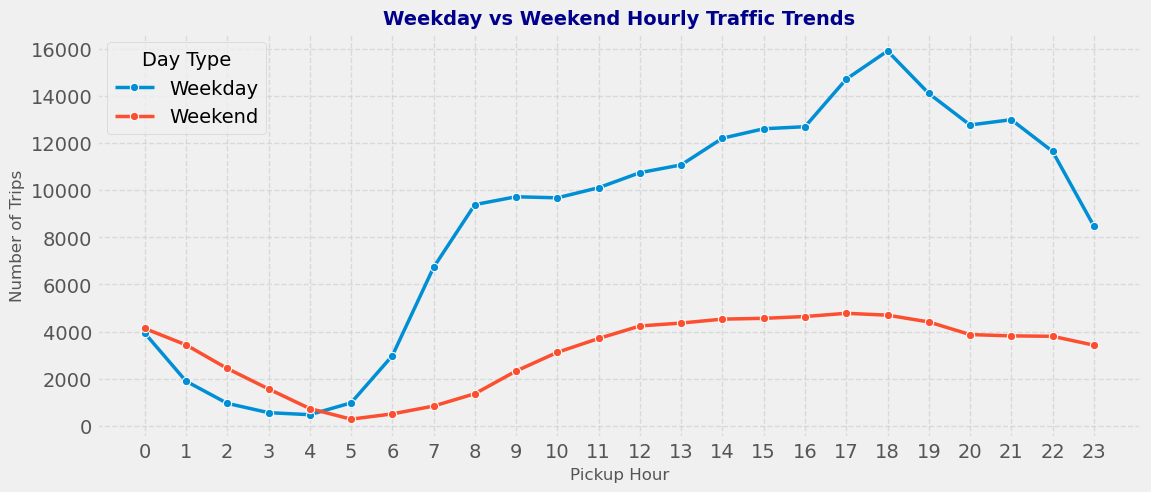

In [257]:
# Compare traffic trends for the week days and weekends

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Filter and count trips per pickup hour for weekdays and weekends
weekday_trips = df_nonzero[df_nonzero['pickup_day'].isin(weekdays)]['pickup_hour'].value_counts().sort_index()
weekend_trips = df_nonzero[df_nonzero['pickup_day'].isin(weekends)]['pickup_hour'].value_counts().sort_index()

# Convert weekday trips data to DataFrame
weekday_trips_df = weekday_trips.reset_index()
weekday_trips_df.columns = ['pickup_hour', 'Number_of_trips']
weekday_trips_df['Day_Type'] = 'Weekday'  # Label the data

# Convert weekend trips data to DataFrame
weekend_trips_df = weekend_trips.reset_index()
weekend_trips_df.columns = ['pickup_hour', 'Number_of_trips']
weekend_trips_df['Day_Type'] = 'Weekend'  # Label the data

# Combine weekday and weekend trip data into a single DataFrame
combined_trips_df = pd.concat([weekday_trips_df, weekend_trips_df])

# Plot the hourly traffic trend for weekdays vs weekends
plt.figure(figsize=(12, 5))
sns.lineplot(data=combined_trips_df, x='pickup_hour', y='Number_of_trips', hue='Day_Type', marker='o', linewidth=2.5)

# Customize plot appearance
plt.title('Weekday vs Weekend Hourly Traffic Trends', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are displayed
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Day Type")

# Show the plot
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [261]:
# Find top 10 pickup and dropoff zones

# Find top 10 pickup zones based on trip count per hour
top_pickup_zones_df = (
    df_nonzero.groupby(['pickup_zone', 'pickup_hour'])
    .size()
    .reset_index(name='Number_of_trips')
    .nlargest(10, 'Number_of_trips')  # Get top 10 highest pickup zones
)

# Extract unique pickup zones
top_pickup_zones = top_pickup_zones_df['pickup_zone'].unique()

# Find top 10 dropoff zones based on trip count per hour
top_dropoff_zones_df = (
    df_nonzero.groupby(['dropoff_zone', 'dropoff_hour'])
    .size()
    .reset_index(name='Number_of_trips')
    .nlargest(10, 'Number_of_trips')  # Get top 10 highest dropoff zones
)

# Extract unique dropoff zones
top_dropoff_zones = top_dropoff_zones_df['dropoff_zone'].unique()

# Display results
print("Top 10 Pickup Zones:")
display(top_pickup_zones_df)

print("\nTop 10 Dropoff Zones:")
display(top_dropoff_zones_df)



Top 10 Pickup Zones:


pickup_zone  pickup_hour  Number_of_trips
1298         Midtown Center           18             1217
1297         Midtown Center           17             1203
1903  Upper East Side South           17             1125
1877  Upper East Side North           15             1068
1299         Midtown Center           19             1062
1901  Upper East Side South           15             1060
1904  Upper East Side South           18             1050
1900  Upper East Side South           14             1040
1902  Upper East Side South           16             1017
913             JFK Airport           22              992


Top 10 Dropoff Zones:


dropoff_zone  dropoff_hour  Number_of_trips
3612  Upper East Side South            18             1058
3588  Upper East Side North            18             1044
3585  Upper East Side North            15             1034
3586  Upper East Side North            16             1003
3587  Upper East Side North            17             1000
3606  Upper East Side South            12              952
3609  Upper East Side South            15              934
3608  Upper East Side South            14              919
3611  Upper East Side South            17              915
3589  Upper East Side North            19              890

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [263]:
# Find the top 10 and bottom 10 pickup/dropoff ratios


# Count trips for each pickup and dropoff zone
pickup_counts = df_nonzero['pickup_zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_trip_counts']

dropoff_counts = df_nonzero['dropoff_zone'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_trip_counts']

# Merge pickup and dropoff counts, ensuring all zones are included
zone_counts = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)

# Calculate the ratio of pickups to dropoffs, handling division by zero
zone_counts['pickup_dropoff_ratio'] = np.where(
    zone_counts['dropoff_trip_counts'] > 0, 
    zone_counts['pickup_trip_counts'] / zone_counts['dropoff_trip_counts'], 
    np.nan  # Assign NaN instead of infinity
)

# Filter out infinite values
zone_counts = zone_counts.dropna(subset=['pickup_dropoff_ratio'])

# Retrieve top 10 highest and lowest pickup/dropoff ratios
highest_ratios = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
lowest_ratios = zone_counts[zone_counts['pickup_trip_counts'] > 0].sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Display results
print("Top 10 Highest Pickup/Dropoff Ratios:")
display(highest_ratios)

print("\nTop 10 Lowest Pickup/Dropoff Ratios:")
display(lowest_ratios)



Top 10 Highest Pickup/Dropoff Ratios:


zone  pickup_trip_counts  dropoff_trip_counts  \
63                  East Elmhurst              1284.0                   92   
116                   JFK Airport             12800.0                 2668   
125             LaGuardia Airport             10225.0                 3519   
201                 South Jamaica                27.0                   15   
174  Penn Station/Madison Sq West              9678.0                 6001   
39                   Central Park              4889.0                 3460   
235                  West Village              6894.0                 5062   
101       Greenwich Village South              3855.0                 2881   
149                  Midtown East             10661.0                 8250   
91               Garment District              4261.0                 3503   

     pickup_dropoff_ratio  
63              13.956522  
116              4.797601  
125              2.905655  
201              1.800000  
174              1.612731  
39               1.413006  
235              1.361912  
101              1.338077  
149              1.292242  
91               1.216386


Top 10 Lowest Pickup/Dropoff Ratios:


zone  pickup_trip_counts  dropoff_trip_counts  \
11                    Bay Ridge                 1.0                  152   
160              Newark Airport                 6.0                  742   
211          Stuyvesant Heights                 2.0                  206   
206  Spuyten Duyvil/Kingsbridge                 1.0                   91   
54          Crown Heights North                 5.0                  387   
229    Washington Heights North                 6.0                  461   
185                   Ridgewood                 2.0                  119   
84                     Flushing                 2.0                  105   
183                   Rego Park                 1.0                   51   
14                      Bedford                 5.0                  255   

     pickup_dropoff_ratio  
11               0.006579  
160              0.008086  
211              0.009709  
206              0.010989  
54               0.012920  
229              0.013015  
185              0.016807  
84               0.019048  
183              0.019608  
14               0.019608

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

'Top 10 Pickup Zones During Night Hours:'

pickup_zone  Trip Count
0                  East Village        2567
1                  West Village        2141
2                   JFK Airport        1938
3               Lower East Side        1612
4                  Clinton East        1565
5       Greenwich Village South        1394
6     Times Sq/Theatre District        1250
7  Penn Station/Madison Sq West        1050
8             LaGuardia Airport         983
9                  East Chelsea         939

'Top 10 Dropoff Zones During Night Hours:'

dropoff_zone  Trip Count
0                   East Village        1386
1                   Clinton East        1073
2                    Murray Hill        1048
3                       Gramercy         970
4                Lenox Hill West         924
5                   East Chelsea         899
6                 Yorkville West         867
7                   West Village         798
8          Upper East Side North         761
9  Sutton Place/Turtle Bay North         738

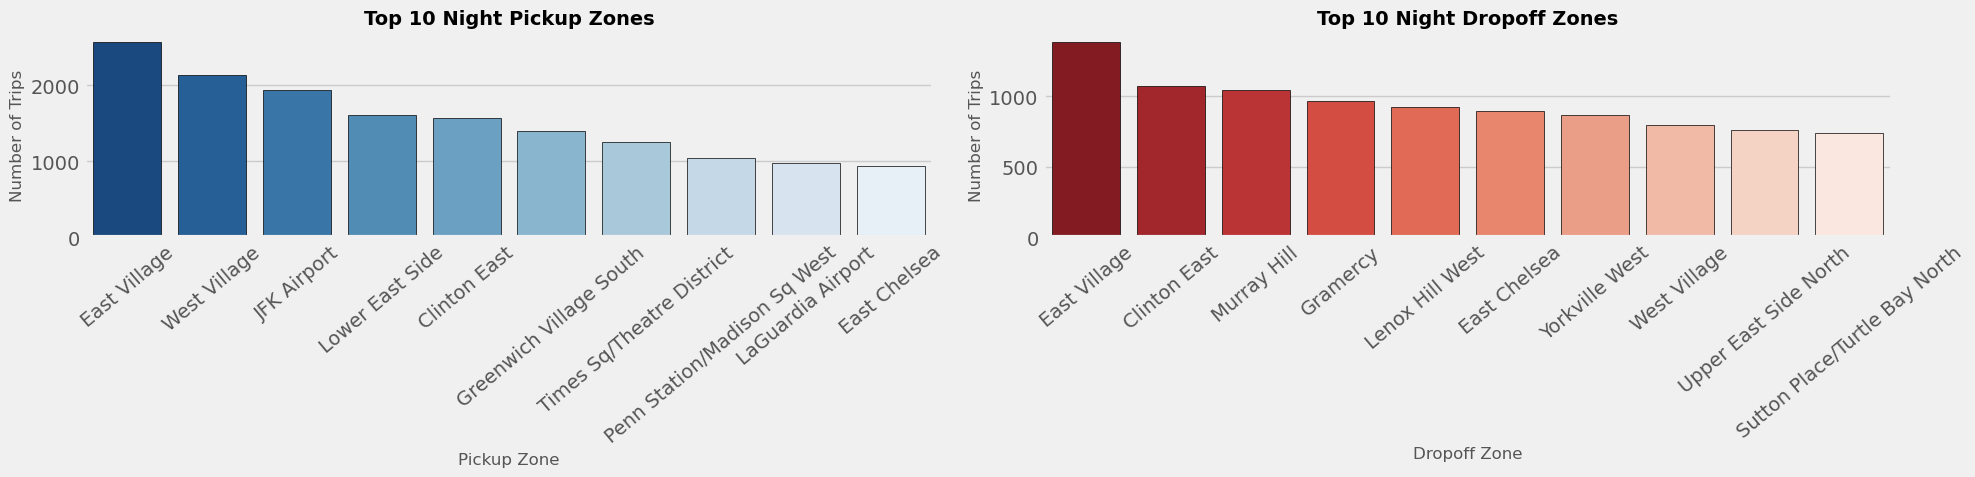

In [265]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Define night hours (11 PM - 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter night-time trips
night_trips = df_nonzero[df_nonzero['pickup_hour'].isin(night_hours)]

# Identify top 10 night-time pickup and dropoff zones
top_night_pickup_zones = night_trips['pickup_zone'].value_counts().nlargest(10).reset_index(name='Trip Count')
top_night_pickup_zones.columns = ['pickup_zone', 'Trip Count']

top_night_dropoff_zones = night_trips['dropoff_zone'].value_counts().nlargest(10).reset_index(name='Trip Count')
top_night_dropoff_zones.columns = ['dropoff_zone', 'Trip Count']

# Display top 10 pickup and dropoff zones during night hours
display('Top 10 Pickup Zones During Night Hours:', top_night_pickup_zones)
display('Top 10 Dropoff Zones During Night Hours:', top_night_dropoff_zones)

# Set up figure for visualization
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))

# Plot night pickup zones trend
sns.barplot(x="pickup_zone", y="Trip Count", data=top_night_pickup_zones, ax=axes[0], palette="Blues_r", edgecolor="black")
axes[0].set_title('Top 10 Night Pickup Zones', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Pickup Zone', fontsize=12)
axes[0].set_ylabel('Number of Trips', fontsize=12)
axes[0].tick_params(axis='x', rotation=40)

# Plot night dropoff zones trend
sns.barplot(x="dropoff_zone", y="Trip Count", data=top_night_dropoff_zones, ax=axes[1], palette="Reds_r", edgecolor="black")
axes[1].set_title('Top 10 Night Dropoff Zones', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Dropoff Zone', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].tick_params(axis='x', rotation=40)

# Adjust layout and show plot
plt.tight_layout()
plt.show()



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Nighttime Revenue Share: 11.98%
Daytime Revenue Share: 88.02%


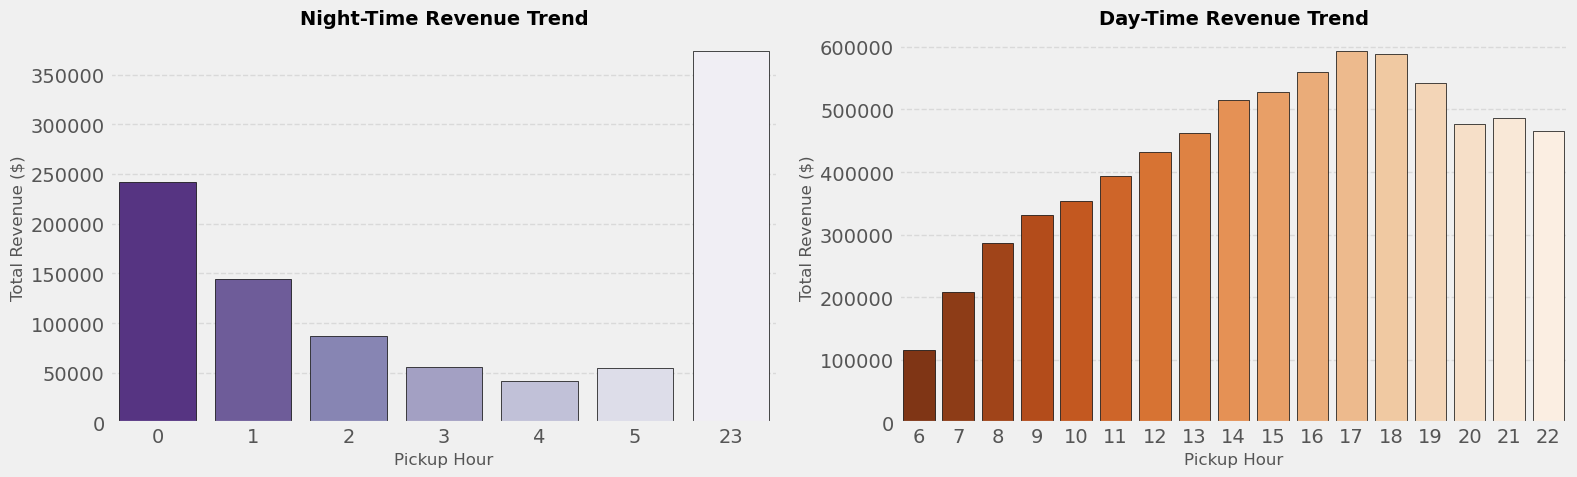

In [267]:
# Filter for night hours (11 PM to 5 AM)

# Define night hours (11 PM - 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter trips based on night and day hours
night_trips = df_nonzero[df_nonzero['pickup_hour'].isin(night_hours)]
day_trips = df_nonzero[~df_nonzero['pickup_hour'].isin(night_hours)]

# Calculate total revenue for night and day trips
night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate revenue share percentages
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Display revenue share percentages
print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")

# Set up figure for visualization
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))

# Plot night-time revenue trend by pickup hour
sns.barplot(
    x=night_trips.groupby('pickup_hour')['total_amount'].sum().index, 
    y=night_trips.groupby('pickup_hour')['total_amount'].sum().values,
    ax=axes[0], 
    palette="Purples_r", 
    edgecolor="black"
)
axes[0].set_title('Night-Time Revenue Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Pickup Hour', fontsize=12)
axes[0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot day-time revenue trend by pickup hour
sns.barplot(
    x=day_trips.groupby('pickup_hour')['total_amount'].sum().index, 
    y=day_trips.groupby('pickup_hour')['total_amount'].sum().values,
    ax=axes[1], 
    palette="Oranges_r", 
    edgecolor="black"
)
axes[1].set_title('Day-Time Revenue Trend', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Pickup Hour', fontsize=12)
axes[1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

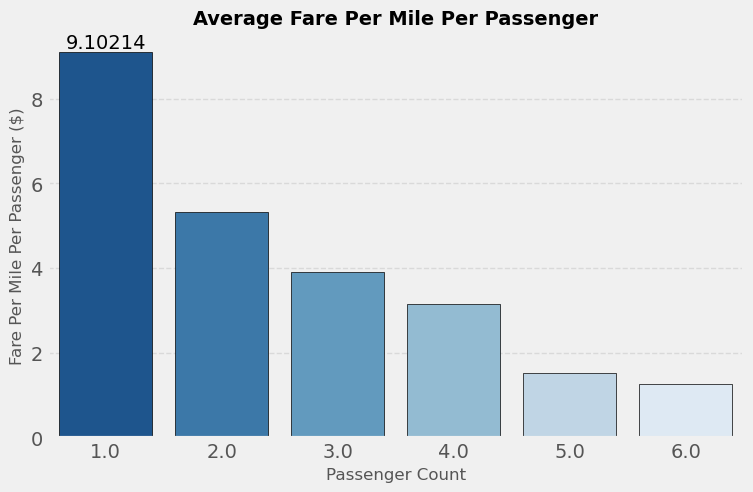

In [269]:
# Analyse the fare per mile per passenger for different passenger counts

# Calculate fare per mile
df_nonzero['fare_per_mile'] = df_nonzero['fare_amount'] / df_nonzero['trip_distance']

# Calculate fare per mile per passenger (to account for shared rides)
df_nonzero['fare_per_mile_per_passenger'] = df_nonzero['fare_per_mile'] / df_nonzero['passenger_count']

# Compute average fare per mile per passenger grouped by passenger count
average_fare_per_mile_per_passenger = (
    df_nonzero.groupby('passenger_count', as_index=False)['fare_per_mile_per_passenger']
    .mean()
)

# Plot the average fare per mile per passenger
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='passenger_count', 
    y='fare_per_mile_per_passenger', 
    data=average_fare_per_mile_per_passenger, 
    palette="Blues_r", 
    edgecolor="black"
)

# Add labels to bars
ax.bar_label(ax.containers[0])

# Customize plot appearance
plt.title("Average Fare Per Mile Per Passenger", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Count", fontsize=12)
plt.ylabel("Fare Per Mile Per Passenger ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display plot
plt.show()




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

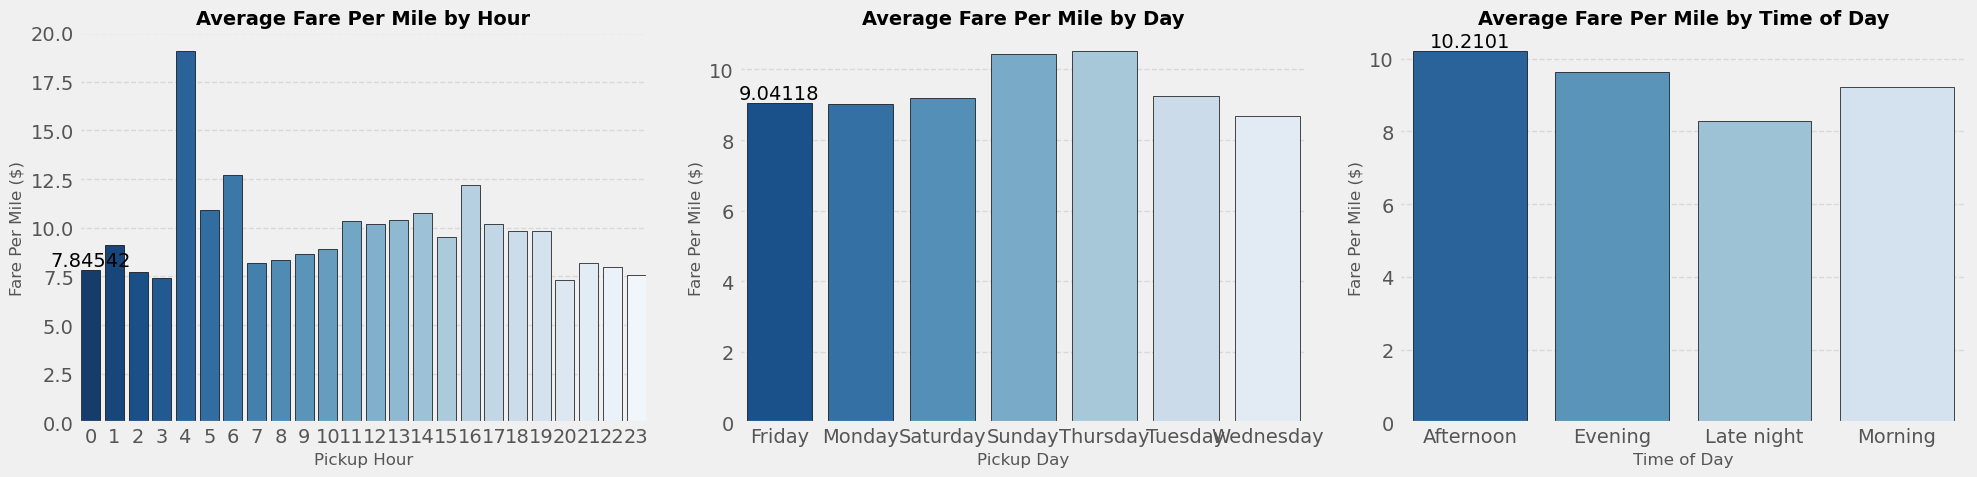

In [271]:
# Compare the average fare per mile for different days and for different times of the day

# Compute average fare per mile for different time categories
avg_fare_per_mile_hour = df_nonzero.groupby('pickup_hour', as_index=False)['fare_per_mile'].mean()
avg_fare_per_mile_day = df_nonzero.groupby('pickup_day', as_index=False)['fare_per_mile'].mean()
avg_fare_per_mile_time = df_nonzero.groupby('pickup_timeofday', as_index=False)['fare_per_mile'].mean()

# Set up figure for visualization
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

# Define common plot settings
plot_settings = {
    "palette": "Blues_r",
    "edgecolor": "black"
}

# Plot average fare per mile by pickup hour
ax = sns.barplot(x='pickup_hour', y='fare_per_mile', data=avg_fare_per_mile_hour, ax=axes[0], **plot_settings)
ax.set_title("Average Fare Per Mile by Hour", fontsize=14, fontweight="bold")
ax.set_xlabel("Pickup Hour", fontsize=12)
ax.set_ylabel("Fare Per Mile ($)", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot average fare per mile by pickup day
ax = sns.barplot(x='pickup_day', y='fare_per_mile', data=avg_fare_per_mile_day, ax=axes[1], **plot_settings)
ax.set_title("Average Fare Per Mile by Day", fontsize=14, fontweight="bold")
ax.set_xlabel("Pickup Day", fontsize=12)
ax.set_ylabel("Fare Per Mile ($)", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot average fare per mile by time of day category
ax = sns.barplot(x='pickup_timeofday', y='fare_per_mile', data=avg_fare_per_mile_time, ax=axes[2], **plot_settings)
ax.set_title("Average Fare Per Mile by Time of Day", fontsize=14, fontweight="bold")
ax.set_xlabel("Time of Day", fontsize=12)
ax.set_ylabel("Fare Per Mile ($)", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

VendorID  pickup_hour  fare_per_mile
0          1            0       6.436954
1          1            1       6.533951
2          1            2       6.487415
3          1            3       6.301017
4          1            4       7.251415
5          1            5       7.954609
6          1            6       6.316077
7          1            7       6.979273
8          1            8       7.989250
9          1            9       8.049961
10         1           10       8.096720
11         1           11       8.442141
12         1           12       8.587476
13         1           13       8.344625
14         1           14       8.663567
15         1           15       8.535760
16         1           16       8.434331
17         1           17       8.372313
18         1           18       8.392756
19         1           19       7.794603
20         1           20       7.183940
21         1           21       7.258498
22         1           22       6.848743
23         1           23       6.502875
24         2            0       8.258212
25         2            1       9.834734
26         2            2       8.117258
27         2            3       7.721368
28         2            4      22.167314
29         2            5      11.946966
30         2            6      15.251025
31         2            7       8.661631
32         2            8       8.506011
33         2            9       8.905576
34         2           10       9.208113
35         2           11      11.009633
36         2           12      10.736291
37         2           13      11.195742
38         2           14      11.476216
39         2           15       9.893136
40         2           16      13.520603
41         2           17      10.803724
42         2           18      10.345926
43         2           19      10.488125
44         2           20       7.358770
45         2           21       8.498526
46         2           22       8.314499
47         2           23       7.877929

<Figure size 1200x500 with 0 Axes>

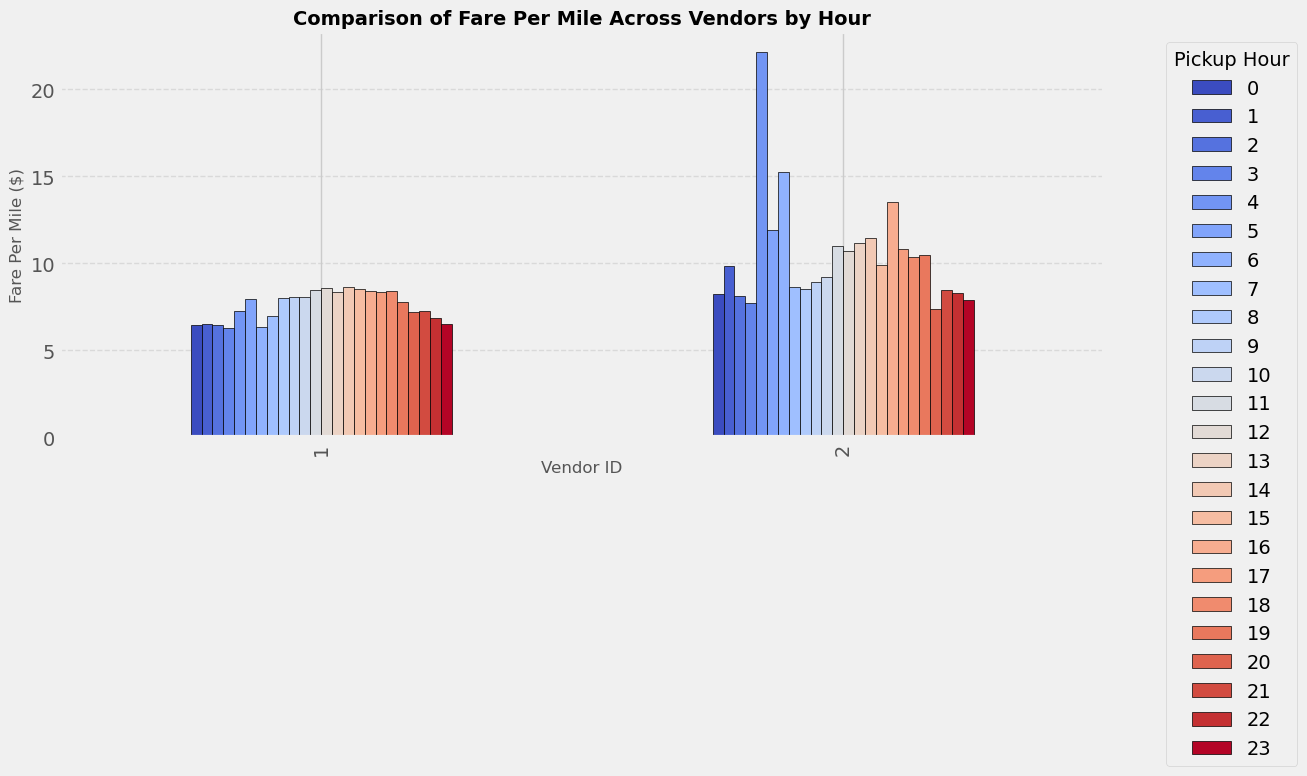

In [273]:
# Compare fare per mile for different vendors

# Compute the average fare per mile for each VendorID across different pickup hours
fare_per_mile_vendor = (
    df_nonzero.pivot_table(
        index='VendorID', 
        columns='pickup_hour', 
        values='fare_per_mile', 
        aggfunc='mean'
    )
)

# Plot the average fare per mile by vendor for different pickup hours
plt.figure(figsize=(12, 5))
fare_per_mile_vendor.plot(kind='bar', figsize=(12, 5), colormap='coolwarm', edgecolor="black")

# Customize plot appearance
plt.title("Comparison of Fare Per Mile Across Vendors by Hour", fontsize=14, fontweight='bold')
plt.xlabel("Vendor ID", fontsize=12)
plt.ylabel("Fare Per Mile ($)", fontsize=12)
plt.legend(title="Pickup Hour", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Compute aggregated fare per mile statistics for each VendorID across hours
df_fare_per_mile = (
    df_nonzero.groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index(name="fare_per_mile")
)

# Display the processed DataFrame
display(df_fare_per_mile)

# Show the plot
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


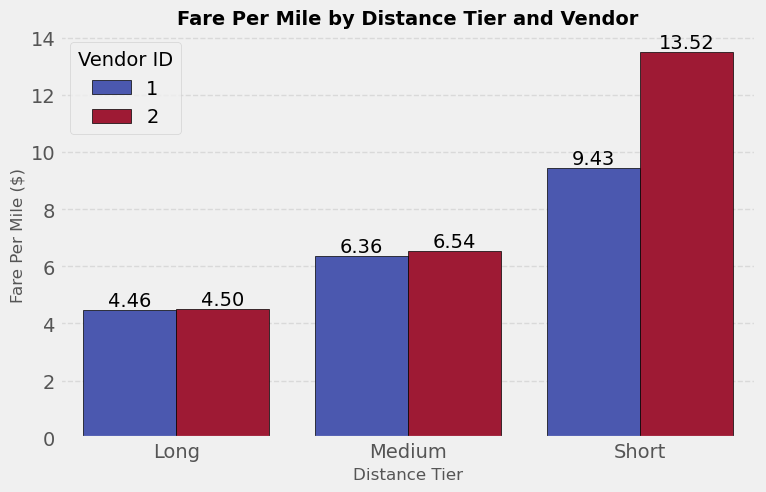

In [275]:
# Defining distance tiers

# Define distance categories based on trip distance
def categorize_trip_distance(distance):
    """
    Categorizes trip distance into three tiers:
    - 'Short': 0 - 2 miles
    - 'Medium': 2 - 5 miles
    - 'Long': > 5 miles
    """
    if distance <= 2:
        return 'Short'
    elif distance <= 5:
        return 'Medium'
    else:
        return 'Long'

# Apply the function to create a new column for distance categories
df_nonzero['distance_tier'] = df_nonzero['trip_distance'].apply(categorize_trip_distance)

# Compute the average fare per mile for each distance category grouped by VendorID
fare_per_mile_by_tier = (
    df_nonzero.groupby(['VendorID', 'distance_tier'], as_index=False)['fare_per_mile']
    .mean()
)

# Set up figure for visualization
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x='distance_tier', 
    y='fare_per_mile', 
    hue='VendorID', 
    data=fare_per_mile_by_tier, 
    palette="coolwarm", 
    edgecolor="black"
)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

# Customize plot appearance
plt.title("Fare Per Mile by Distance Tier and Vendor", fontsize=14, fontweight="bold")
plt.xlabel("Distance Tier", fontsize=12)
plt.ylabel("Fare Per Mile ($)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Vendor ID")

# Display plot
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

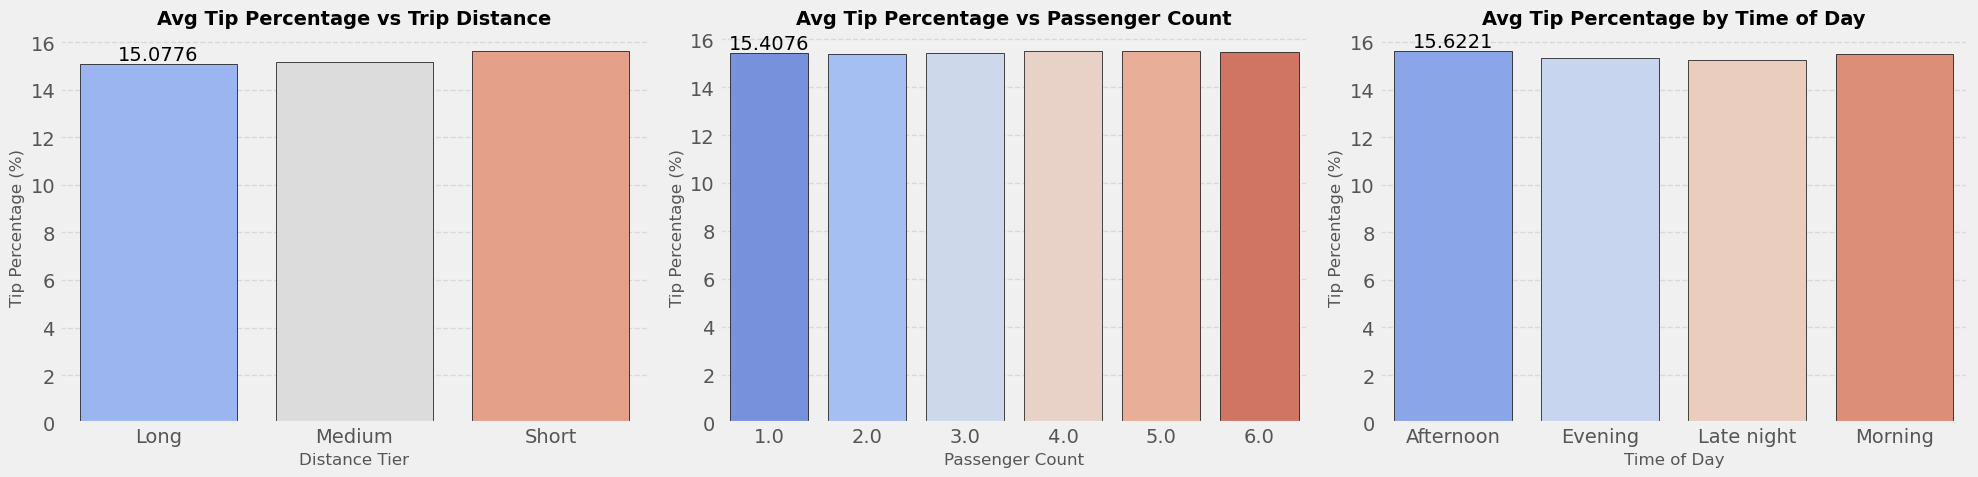

In [277]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage as a proportion of the total amount
df_nonzero['tip_percentage'] = (df_nonzero['tip_amount'] / df_nonzero['total_amount']) * 100

# Aggregate average tip percentage based on different factors
tip_by_distance = df_nonzero.groupby('distance_tier', as_index=False)['tip_percentage'].mean()
tip_by_passenger = df_nonzero.groupby('passenger_count', as_index=False)['tip_percentage'].mean()
tip_by_time = df_nonzero.groupby('pickup_timeofday', as_index=False)['tip_percentage'].mean()

# Set up figure for visualization
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

# Define common barplot settings
plot_settings = {
    "palette": "coolwarm",
    "edgecolor": "black"
}

# Plot tip percentage vs trip distance
ax = sns.barplot(x='distance_tier', y='tip_percentage', data=tip_by_distance, ax=axes[0], **plot_settings)
ax.set_title("Avg Tip Percentage vs Trip Distance", fontsize=14, fontweight="bold")
ax.set_xlabel("Distance Tier", fontsize=12)
ax.set_ylabel("Tip Percentage (%)", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot tip percentage vs passenger count
ax = sns.barplot(x='passenger_count', y='tip_percentage', data=tip_by_passenger, ax=axes[1], **plot_settings)
ax.set_title("Avg Tip Percentage vs Passenger Count", fontsize=14, fontweight="bold")
ax.set_xlabel("Passenger Count", fontsize=12)
ax.set_ylabel("Tip Percentage (%)", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot tip percentage vs time of day
ax = sns.barplot(x='pickup_timeofday', y='tip_percentage', data=tip_by_time, ax=axes[2], **plot_settings)
ax.set_title("Avg Tip Percentage by Time of Day", fontsize=14, fontweight="bold")
ax.set_xlabel("Time of Day", fontsize=12)
ax.set_ylabel("Tip Percentage (%)", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Trip Distance Comparison:


Low Tip       High Tip
count  41782.000000  241153.000000
mean       3.571169       3.382102
std        4.621494       4.344409
min        0.010000       0.010000
25%        1.190000       1.100000
50%        2.000000       1.800000
75%        3.550000       3.300000
max      187.350000      67.510000


Passenger Count Comparison:


Low Tip       High Tip
count  41782.000000  241153.000000
mean       1.355081       1.371163
std        0.853810       0.866062
min        1.000000       1.000000
25%        1.000000       1.000000
50%        1.000000       1.000000
75%        1.000000       1.000000
max        6.000000       6.000000


Fare Amount Comparison:


Low Tip       High Tip
count  41782.000000  241153.000000
mean      20.158507      19.144742
std       18.170279      16.818730
min        3.000000       3.000000
25%       10.000000       9.300000
50%       14.900000      13.500000
75%       22.600000      21.200000
max      365.600000     353.000000

<Figure size 1000x500 with 0 Axes>

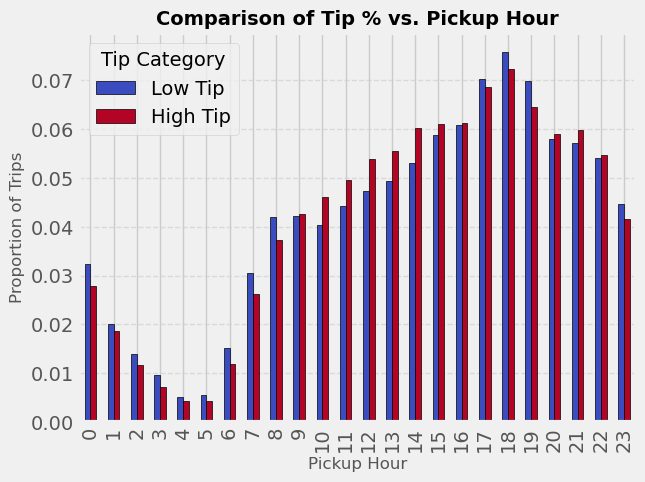

In [279]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_nonzero['tip_category'] = df_nonzero['tip_percentage'].apply(
    lambda x: 'High Tip' if x > 10 else 'Low Tip'
)

# Separate high-tip and low-tip trips for comparison
low_tip_trips = df_nonzero[df_nonzero['tip_category'] == 'Low Tip']
high_tip_trips = df_nonzero[df_nonzero['tip_category'] == 'High Tip']

# Compare trip distance statistics between low-tip and high-tip trips
distance_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['trip_distance'].describe(),
    'High Tip': high_tip_trips['trip_distance'].describe()
})

# Compare passenger count statistics
passenger_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['passenger_count'].describe(),
    'High Tip': high_tip_trips['passenger_count'].describe()
})

# Compare fare amount statistics
fare_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['fare_amount'].describe(),
    'High Tip': high_tip_trips['fare_amount'].describe()
})

# Compare pickup hour distribution for low-tip vs. high-tip trips
pickup_time_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['pickup_hour'].value_counts(normalize=True).sort_index(),
    'High Tip': high_tip_trips['pickup_hour'].value_counts(normalize=True).sort_index()
})

# Display statistical comparisons
print("Trip Distance Comparison:")
display(distance_comparison)

print("\nPassenger Count Comparison:")
display(passenger_comparison)

print("\nFare Amount Comparison:")
display(fare_comparison)

# Plot the distribution of pickup times for low-tip vs. high-tip trips
plt.figure(figsize=(10, 5))
pickup_time_comparison.plot(kind='bar', colormap='coolwarm', edgecolor="black")
plt.title('Comparison of Tip % vs. Pickup Hour', fontsize=14, fontweight="bold")
plt.xlabel("Pickup Hour", fontsize=12)
plt.ylabel("Proportion of Trips", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Tip Category")
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

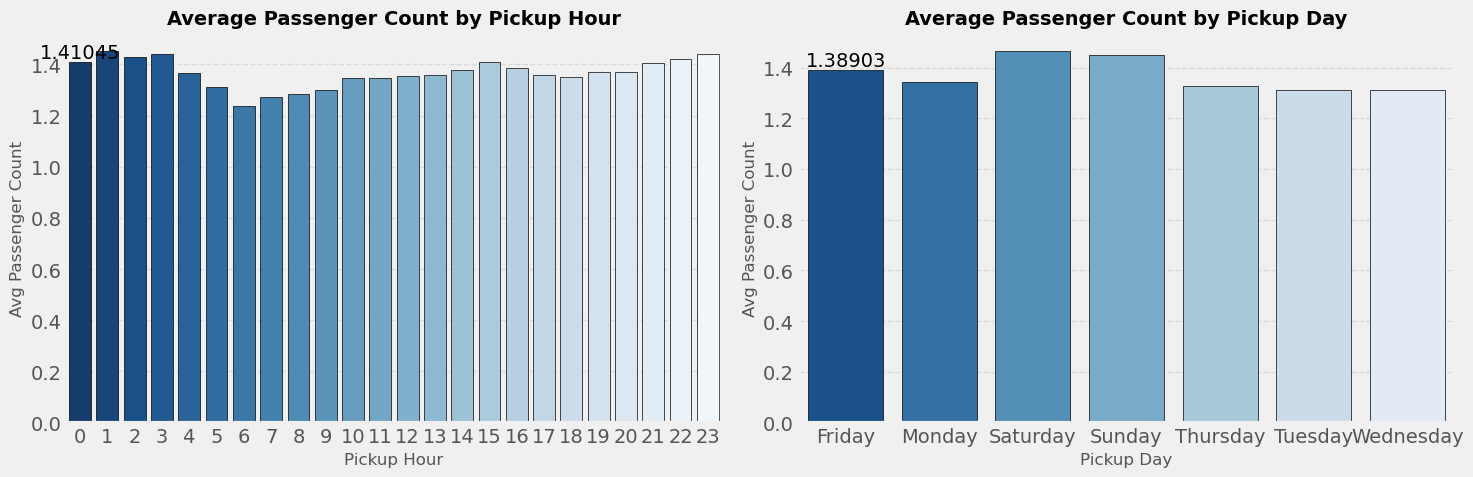

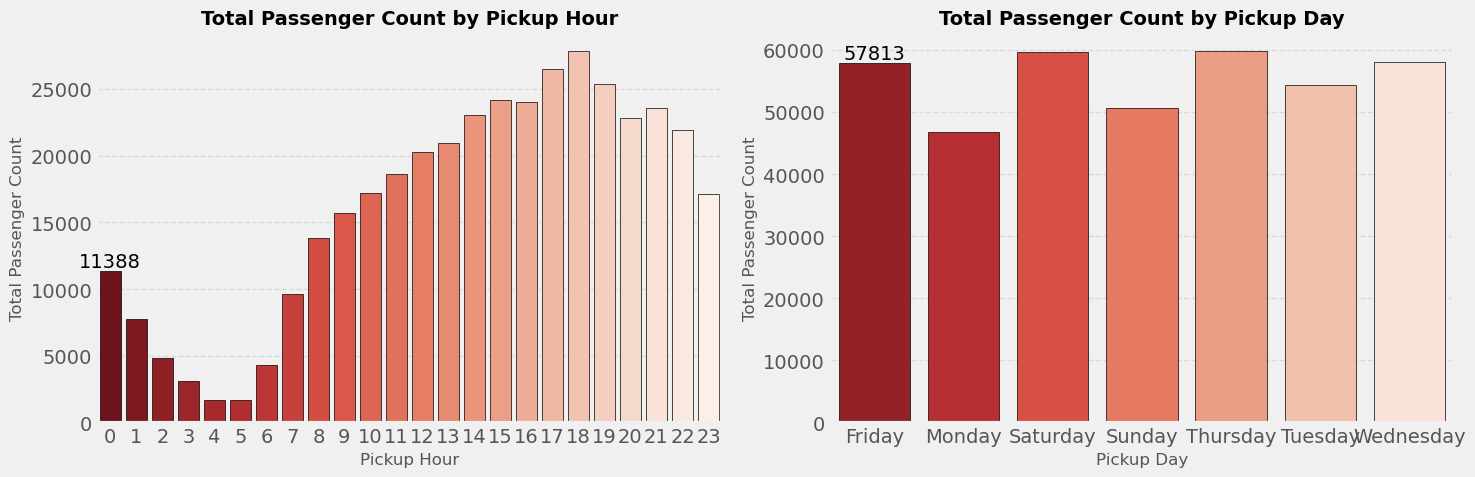

In [281]:
# See how passenger count varies across hours and days

# Compute average and total passenger count per pickup hour and day
avg_passenger_by_hour = df_nonzero.groupby('pickup_hour', as_index=False)['passenger_count'].mean()
avg_passenger_by_day = df_nonzero.groupby('pickup_day', as_index=False)['passenger_count'].mean()
total_passenger_by_hour = df_nonzero.groupby('pickup_hour', as_index=False)['passenger_count'].sum()
total_passenger_by_day = df_nonzero.groupby('pickup_day', as_index=False)['passenger_count'].sum()

# Set up figure for visualization of average passenger count
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot average passenger count by pickup hour
ax = sns.barplot(x='pickup_hour', y='passenger_count', data=avg_passenger_by_hour, ax=axes[0], palette="Blues_r", edgecolor="black")
ax.set_title("Average Passenger Count by Pickup Hour", fontsize=14, fontweight="bold")
ax.set_xlabel("Pickup Hour", fontsize=12)
ax.set_ylabel("Avg Passenger Count", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot average passenger count by pickup day
ax = sns.barplot(x='pickup_day', y='passenger_count', data=avg_passenger_by_day, ax=axes[1], palette="Blues_r", edgecolor="black")
ax.set_title("Average Passenger Count by Pickup Day", fontsize=14, fontweight="bold")
ax.set_xlabel("Pickup Day", fontsize=12)
ax.set_ylabel("Avg Passenger Count", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Set up figure for visualization of total passenger count
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

# Plot total passenger count by pickup hour
ax = sns.barplot(x='pickup_hour', y='passenger_count', data=total_passenger_by_hour, ax=axes[0], palette="Reds_r", edgecolor="black")
ax.set_title("Total Passenger Count by Pickup Hour", fontsize=14, fontweight="bold")
ax.set_xlabel("Pickup Hour", fontsize=12)
ax.set_ylabel("Total Passenger Count", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Plot total passenger count by pickup day
ax = sns.barplot(x='pickup_day', y='passenger_count', data=total_passenger_by_day, ax=axes[1], palette="Reds_r", edgecolor="black")
ax.set_title("Total Passenger Count by Pickup Day", fontsize=14, fontweight="bold")
ax.set_xlabel("Pickup Day", fontsize=12)
ax.set_ylabel("Total Passenger Count", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

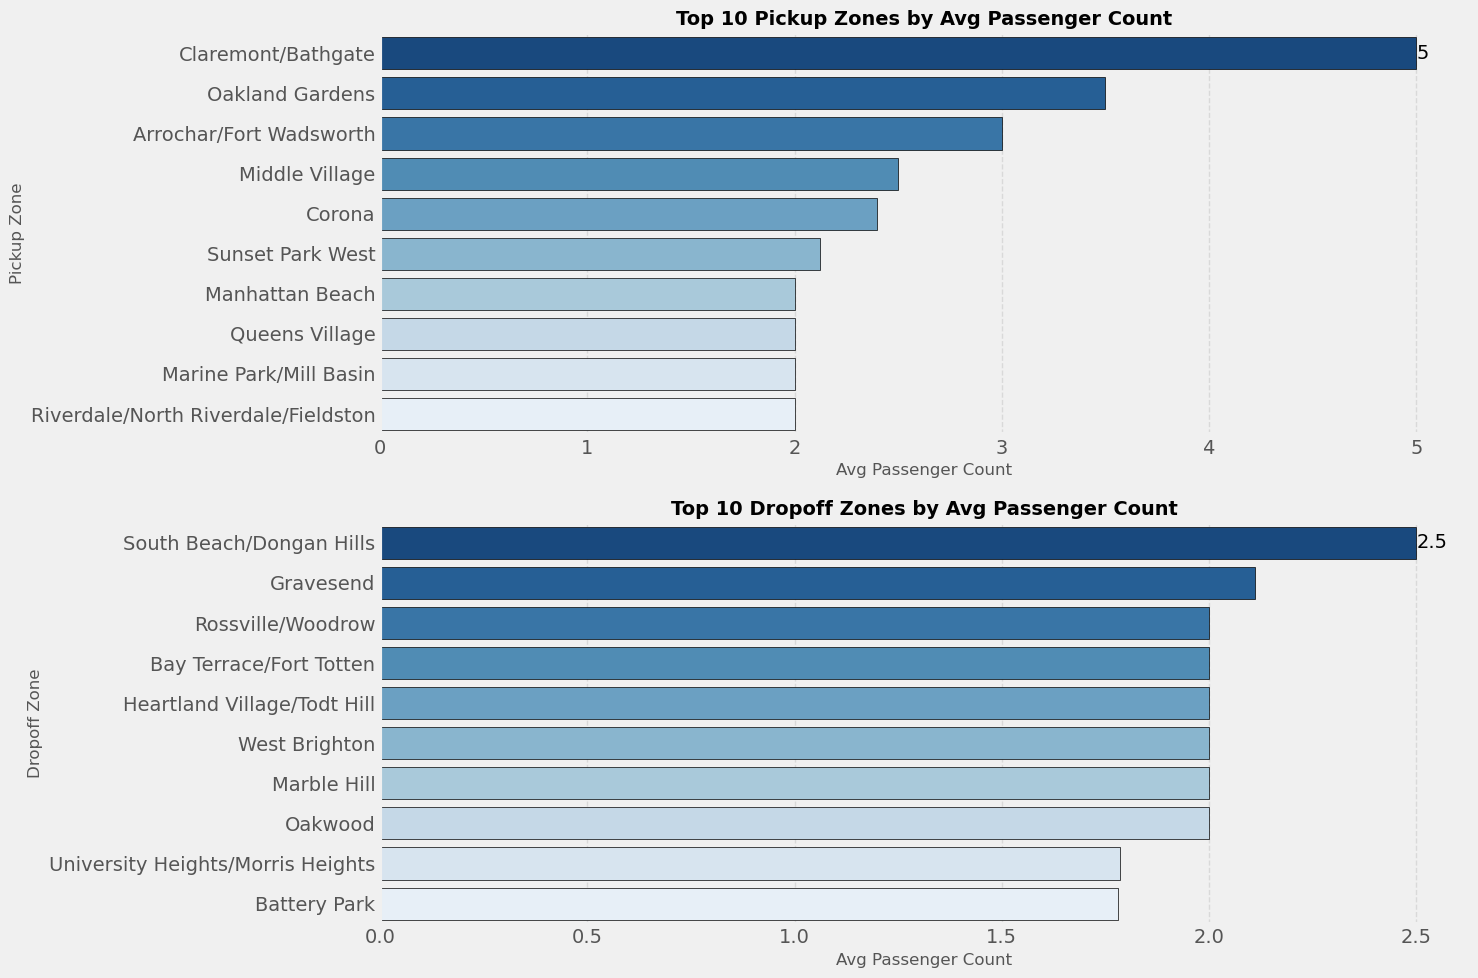

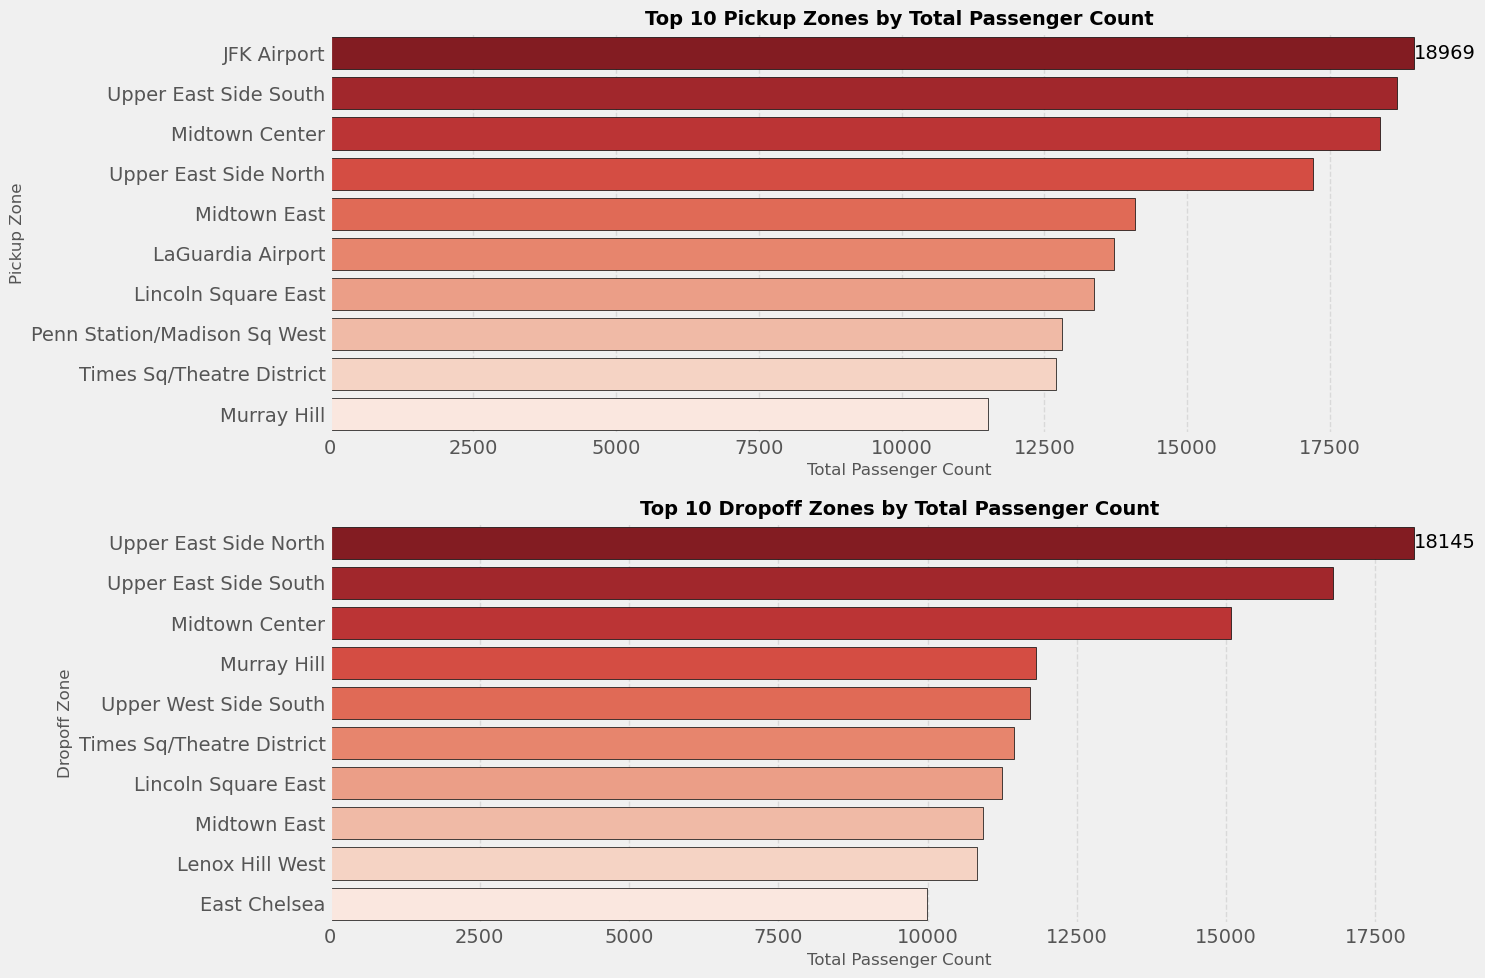

In [283]:
# How does passenger count vary across zones

# Compute average passenger count per pickup and dropoff zone
avg_passenger_by_pickup_zone = df_nonzero.groupby('pickup_zone', as_index=False)['passenger_count'].mean()
avg_passenger_by_dropoff_zone = df_nonzero.groupby('dropoff_zone', as_index=False)['passenger_count'].mean()

# Set up figure for visualization of average passenger count by zone
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))

# Plot top 10 pickup zones by average passenger count
ax = sns.barplot(
    x='passenger_count', y='pickup_zone', 
    data=avg_passenger_by_pickup_zone.sort_values(by='passenger_count', ascending=False).head(10), 
    ax=axes[0], palette="Blues_r", edgecolor="black"
)
ax.set_title("Top 10 Pickup Zones by Avg Passenger Count", fontsize=14, fontweight="bold")
ax.set_xlabel("Avg Passenger Count", fontsize=12)
ax.set_ylabel("Pickup Zone", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Plot top 10 dropoff zones by average passenger count
ax = sns.barplot(
    x='passenger_count', y='dropoff_zone', 
    data=avg_passenger_by_dropoff_zone.sort_values(by='passenger_count', ascending=False).head(10), 
    ax=axes[1], palette="Blues_r", edgecolor="black"
)
ax.set_title("Top 10 Dropoff Zones by Avg Passenger Count", fontsize=14, fontweight="bold")
ax.set_xlabel("Avg Passenger Count", fontsize=12)
ax.set_ylabel("Dropoff Zone", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Compute total passenger count per pickup and dropoff zone
total_passenger_by_pickup_zone = df_nonzero.groupby('pickup_zone', as_index=False)['passenger_count'].sum()
total_passenger_by_dropoff_zone = df_nonzero.groupby('dropoff_zone', as_index=False)['passenger_count'].sum()

# Set up figure for visualization of total passenger count by zone
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))

# Plot top 10 pickup zones by total passenger count
ax = sns.barplot(
    x='passenger_count', y='pickup_zone', 
    data=total_passenger_by_pickup_zone.sort_values(by='passenger_count', ascending=False).head(10), 
    ax=axes[0], palette="Reds_r", edgecolor="black"
)
ax.set_title("Top 10 Pickup Zones by Total Passenger Count", fontsize=14, fontweight="bold")
ax.set_xlabel("Total Passenger Count", fontsize=12)
ax.set_ylabel("Pickup Zone", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Plot top 10 dropoff zones by total passenger count
ax = sns.barplot(
    x='passenger_count', y='dropoff_zone', 
    data=total_passenger_by_dropoff_zone.sort_values(by='passenger_count', ascending=False).head(10), 
    ax=axes[1], palette="Reds_r", edgecolor="black"
)
ax.set_title("Top 10 Dropoff Zones by Total Passenger Count", fontsize=14, fontweight="bold")
ax.set_xlabel("Total Passenger Count", fontsize=12)
ax.set_ylabel("Dropoff Zone", fontsize=12)
ax.bar_label(ax.containers[0])
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [289]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame


# Compute total number of trips and total passenger count per pickup zone
pickup_zone_passenger_counts = (
    df_nonzero.groupby('pickup_zone', as_index=False)
    .agg(
        total_trips=('passenger_count', 'count'),  # Total trips per zone
        total_passengers=('passenger_count', 'sum')  # Total passengers per zone
    )
)

# Merge trip data with zones to include passenger count and trip numbers per zone
zones_with_trips = zones.merge(
    pickup_zone_passenger_counts, 
    left_on='zone', 
    right_on='pickup_zone', 
    how='left'
)

# Compute the average passenger count per trip in each zone
zones_with_trips['average_passenger_count'] = (
    zones_with_trips['total_passengers'] / zones_with_trips['total_trips']
)

# Sort zones by highest average passenger count and display the top 10
top_avg_passenger_zones = zones_with_trips.sort_values(
    by='average_passenger_count', ascending=False
).head(10)

# Display results
display(top_avg_passenger_zones)



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
141        47    0.089828    0.000163       Claremont/Bathgate          47   
124       175    0.134898    0.000505          Oakland Gardens         175   
146         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
123       160    0.141519    0.000571           Middle Village         160   
98         57    0.019271    0.000018                   Corona          56   
99         56    0.056848    0.000181                   Corona          56   
100       228    0.177685    0.000993         Sunset Park West         228   
164       222    0.048389    0.000130            Starrett City         222   
148       150    0.089331    0.000333          Manhattan Beach         150   
143       253    0.036051    0.000078            Willets Point         253   

           borough                                           geometry  \
141          Bronx  POLYGON ((1.01e+06 2.5e+05, 1.01e+06 2.5e+05, ...   
124         Queens  POLYGON ((1.05e+06 2.16e+05, 1.05e+06 2.15e+05...   
146  Staten Island  POLYGON ((9.67e+05 1.59e+05, 9.67e+05 1.59e+05...   
123         Queens  POLYGON ((1.02e+06 2.03e+05, 1.02e+06 2.03e+05...   
98          Queens  POLYGON ((1.03e+06 2.12e+05, 1.02e+06 2.12e+05...   
99          Queens  POLYGON ((1.02e+06 2.12e+05, 1.02e+06 2.11e+05...   
100       Brooklyn  POLYGON ((9.85e+05 1.83e+05, 9.85e+05 1.83e+05...   
164       Brooklyn  MULTIPOLYGON (((1.02e+06 1.76e+05, 1.02e+06 1....   
148       Brooklyn  POLYGON ((1e+06 1.52e+05, 1e+06 1.52e+05, 1e+0...   
143         Queens  POLYGON ((1.03e+06 2.18e+05, 1.03e+06 2.18e+05...   

     PULocationID  Number_of_trips              pickup_zone  total_trips  \
141          47.0              1.0       Claremont/Bathgate          1.0   
124         175.0              2.0          Oakland Gardens          2.0   
146           6.0              1.0  Arrochar/Fort Wadsworth          1.0   
123         160.0              2.0           Middle Village          2.0   
98           56.0             10.0                   Corona         10.0   
99           56.0             10.0                   Corona         10.0   
100         228.0              8.0         Sunset Park West          8.0   
164         222.0              1.0            Starrett City          1.0   
148         150.0              1.0          Manhattan Beach          1.0   
143         253.0              1.0            Willets Point          1.0   

     total_passengers  average_passenger_count  
141               5.0                    5.000  
124               7.0                    3.500  
146               3.0                    3.000  
123               5.0                    2.500  
98               24.0                    2.400  
99               24.0                    2.400  
100              17.0                    2.125  
164               2.0                    2.000  
148               2.0                    2.000  
143               2.0                    2.000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [293]:
# How often is each surcharge applied?

# Define surcharge-related columns to analyze their application frequency
surcharge_columns = [
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
    'improvement_surcharge', 'congestion_surcharge', 'airport_fee_combined'
]

# Compute how often each surcharge is applied by checking non-zero values
surcharge_frequencies = (
    df_nonzero[surcharge_columns]
    .gt(0)  # Convert to boolean (True if surcharge applied, False otherwise)
    .sum()  # Count occurrences of each surcharge
    .reset_index()
)

# Rename columns for better readability
surcharge_frequencies.columns = ['Surcharge_Type', 'Frequency']

# Sort surcharge types by frequency and display the results
surcharge_frequencies_sorted = surcharge_frequencies.sort_values(by='Frequency', ascending=False)
display(surcharge_frequencies_sorted)



Surcharge_Type  Frequency
2             tip_amount     282935
4  improvement_surcharge     282932
1                mta_tax     281400
5   congestion_surcharge     268656
0                  extra     179530
6   airport_fee_combined      23199
3           tolls_amount      22656

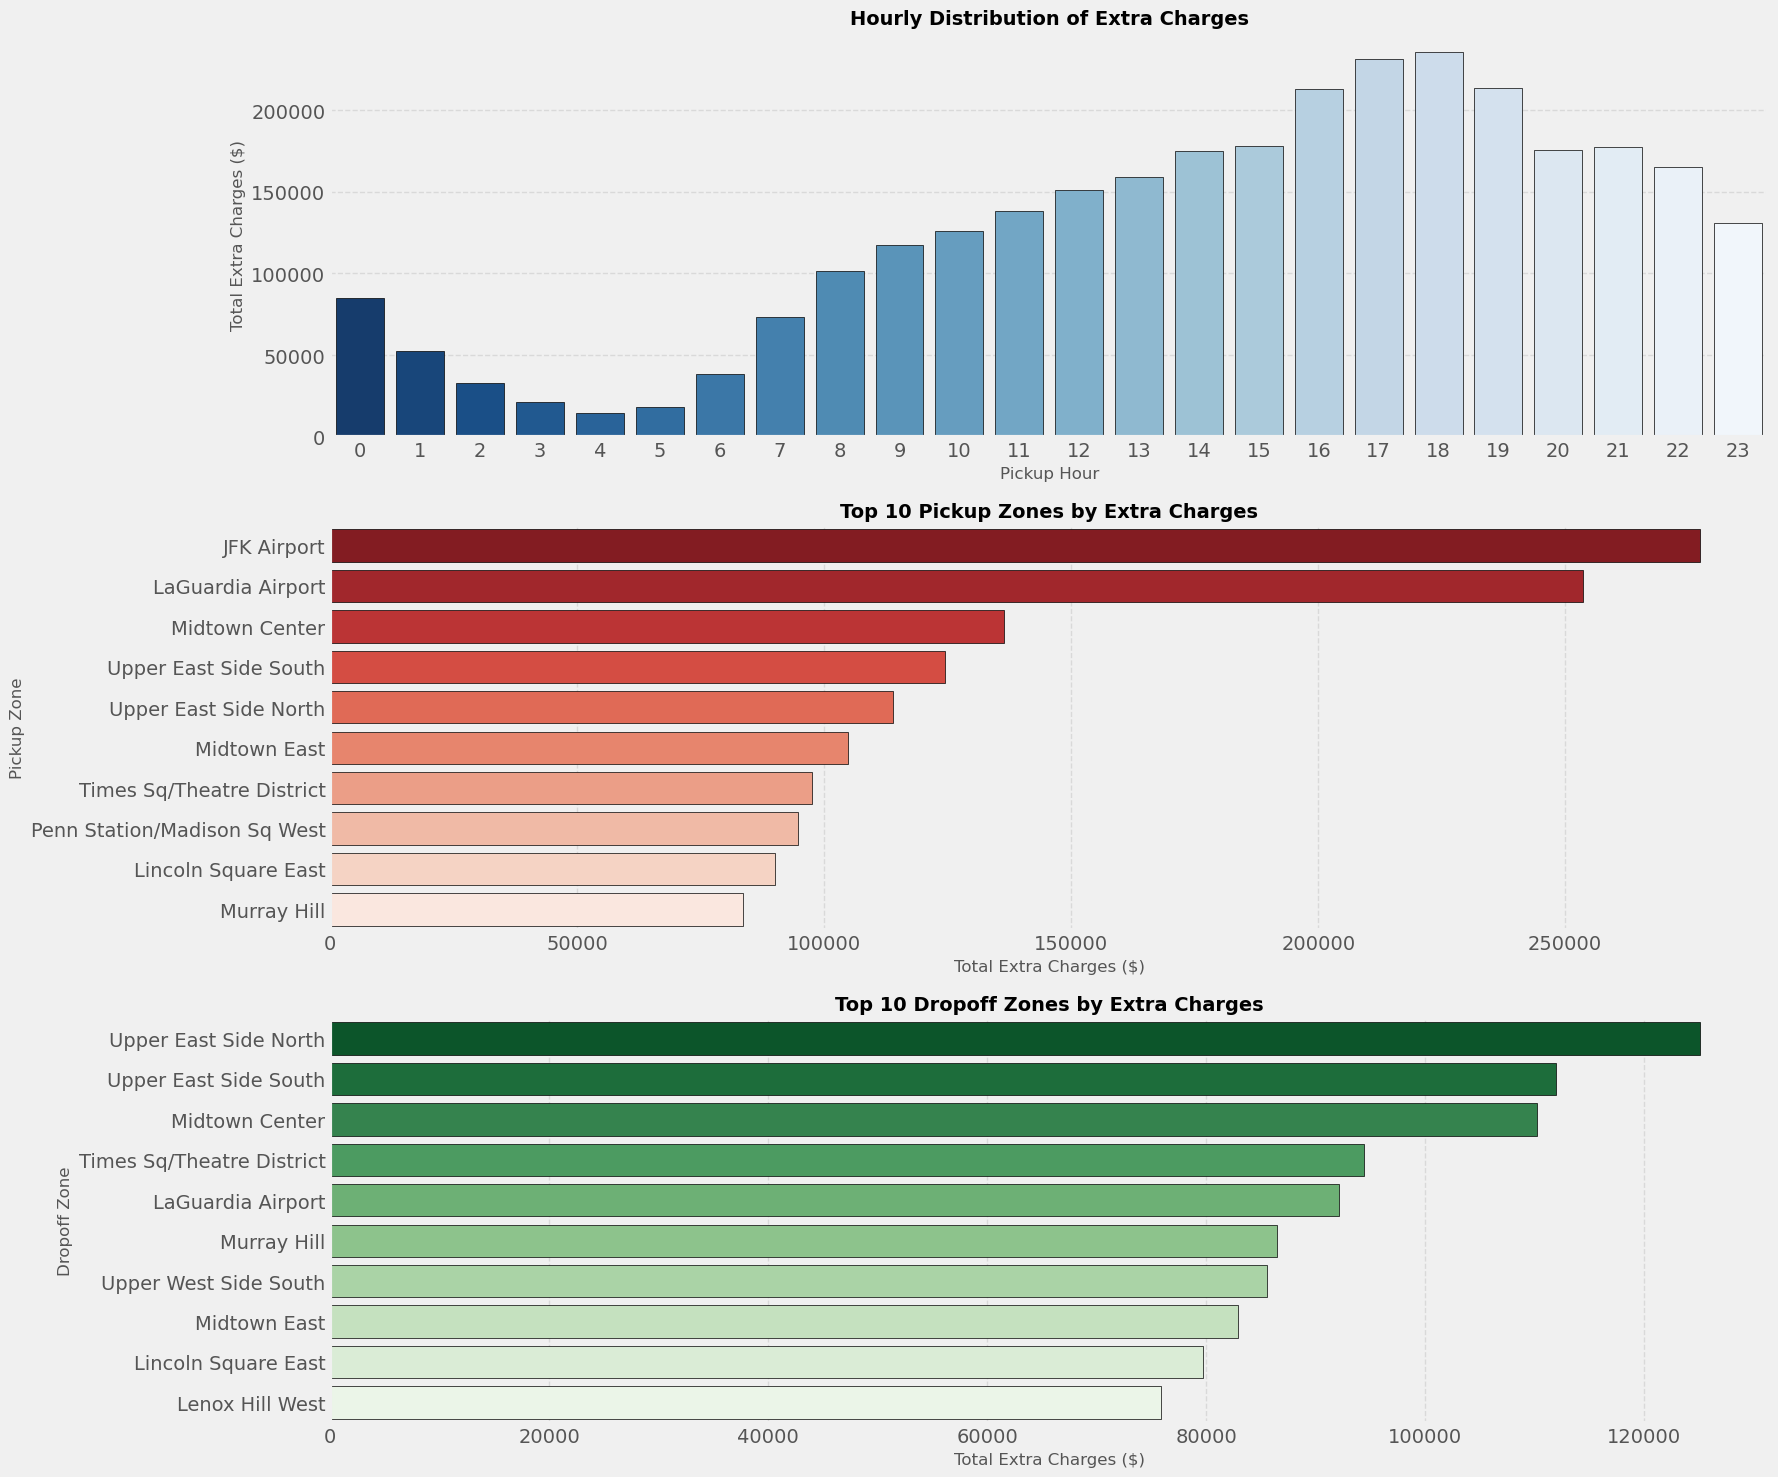

In [295]:

# Calculate the total extra charges for each trip (excluding base fare)
df_nonzero['total_extra_amount'] = (
    df_nonzero['extra'] + df_nonzero['mta_tax'] + df_nonzero['tip_amount'] +
    df_nonzero['tolls_amount'] + df_nonzero['improvement_surcharge'] + df_nonzero['congestion_surcharge']
)

# Compute total extra charges aggregated by pickup zone, dropoff zone, and pickup hour
pickup_extra_charges = df_nonzero.groupby('pickup_zone', as_index=False)['total_extra_amount'].sum()
dropoff_extra_charges = df_nonzero.groupby('dropoff_zone', as_index=False)['total_extra_amount'].sum()
hourly_extra_charges = df_nonzero.groupby('pickup_hour', as_index=False)['total_extra_amount'].sum()

# Set up figure for visualization
fig, axes = plt.subplots(nrows=3, figsize=(18, 15))

# Plot hourly distribution of extra charges
sns.barplot(x='pickup_hour', y='total_extra_amount', data=hourly_extra_charges, ax=axes[0], palette="Blues_r", edgecolor="black")
axes[0].set_title("Hourly Distribution of Extra Charges", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Pickup Hour", fontsize=12)
axes[0].set_ylabel("Total Extra Charges ($)", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Plot top 10 pickup zones with the highest extra charges
sns.barplot(
    x='total_extra_amount', y='pickup_zone',
    data=pickup_extra_charges.sort_values(by='total_extra_amount', ascending=False).head(10),
    ax=axes[1], palette="Reds_r", edgecolor="black"
)
axes[1].set_title("Top 10 Pickup Zones by Extra Charges", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Total Extra Charges ($)", fontsize=12)
axes[1].set_ylabel("Pickup Zone", fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# Plot top 10 dropoff zones with the highest extra charges
sns.barplot(
    x='total_extra_amount', y='dropoff_zone',
    data=dropoff_extra_charges.sort_values(by='total_extra_amount', ascending=False).head(10),
    ax=axes[2], palette="Greens_r", edgecolor="black"
)
axes[2].set_title("Top 10 Dropoff Zones by Extra Charges", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Total Extra Charges ($)", fontsize=12)
axes[2].set_ylabel("Dropoff Zone", fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Peak-Hour Optimization:
- Evening rush hours (5 PM - 7 PM) are the busiest—increase fleet availability in high-demand zones (Midtown, Upper East Side, JFK Airport) during these hours.
- Use real-time traffic data to dynamically reroute taxis away from congestion hotspots for faster service.
### Weekend vs. Weekday Allocation:
- Weekdays have higher taxi demand than weekends, especially in business districts—allocate more taxis to downtown and corporate areas during weekdays.
- Weekends show increased night-time demand (10 PM - 3 AM)—dispatch more taxis to entertainment zones, airports, and nightlife districts.
### Geofencing High-Demand Zones:
- Implement dynamic pricing or priority dispatching in zones with consistently high demand (e.g., airports, business hubs).
- Balance supply in low-demand areas by introducing incentives for drivers to operate in under-served regions.
### Reducing High Fare Per Mile Variability:
- Short trips have the highest fare per mile, while long trips have the lowest—drivers should be encouraged to optimize ride mix to balance earnings.
- Avoid routing drivers through high-toll areas unless necessary, as toll-heavy routes increase passenger fare but do not benefit drivers significantly.
### Enhancing Service Quality & Customer Experience
- Areas with high tip percentages should be prioritized in dispatching—drivers should be encouraged to accept trips from zones with historically generous tippers.
- Solo riders tip more—identify patterns and suggest single-rider preference areas for better service quality.
- Long trips have lower fare per mile but steady earnings, while short trips have high per-mile fares but lower revenue per ride—encourage balanced dispatching between short and long-distance trips.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Peak-Hour Positioning for Maximum Efficiency-
- Weekday Rush Hour (5 PM - 7 PM) → Deploy More Cabs in Business & Transit Hubs. Highest trip demand is during evening rush hours, particularly in corporate and transit-heavy areas. Strategically position cabs in Midtown, Downtown, and Financial Districts to serve office commuters efficiently and assign additional cabs to train stations, metro hubs, and airports to capture high commuter traffic.
- Morning Rush Hour (7 AM - 9 AM) → Target Residential Areas, Deploy more cabs in residential neighborhoods (Brooklyn, Queens, Jersey City) to capture commuters heading to work. Position cabs near subway stations and bus hubs to serve riders heading to transit points. 
- Late-Night (10 PM - 3 AM) → Cover Entertainment & Airport Zones, High demand in Times Square, Lower East Side, Williamsburg, and nightlife hotspots—increase cab presence here. Allocate cabs to airports (JFK, LGA) and major hotels to serve night travelers.
### Optimizing Cab Deployment by Day of the Week
- Weekdays → Focus on Business Districts & Commuter Routes, Business districts like Midtown, Financial District, and Downtown Brooklyn have high demand. More cabs in these areas from 7 AM - 9 AM and 5 PM - 7 PM to handle office commute traffic.
- Weekends → Shift Cabs to Entertainment, Shopping, & Tourist Areas, Friday & Saturday nights see high demand from 10 PM - 3 AM in nightlife districts. Position cabs in Times Square, Meatpacking District, SoHo, Williamsburg, and East Village for nightlife demand. Shopping and tourist destinations like Fifth Avenue, Central Park, and Museums should have increased cab presence.
- Sunday Afternoons & Evenings → Increase Availability in Airport & Transit Hubs, Many travelers return home on Sundays → increase cab presence at airports, train stations, and bus terminals.
### Seasonal Cab Deployment (Monthly)
- Summer Months (May - August) → Focus on Tourist & Recreational Areas, Increased rides to parks, beaches, and sightseeing destinations—deploy more cabs around Central Park, Coney Island, Rockaway Beach, and Staten Island Ferry. High airport travel during the summer → increase availability at JFK, LaGuardia, and Newark airports.
- Winter Months (November - February) → Prioritize Commuter Routes & Shopping Hubs, Cold weather increases demand for short rides—deploy cabs in high-density office and residential areas. Holiday season (November - December) sees high shopping traffic—position cabs near Fifth Avenue, Macy’s, and outlet malls.
- Festive Season (Thanksgiving, Christmas, New Year) → Airports & Hotels, Peak travel days before and after holidays → prioritize airport, train station, and major hotel deployments.
### Positioning Based on Distance & Fare Optimization
- Optimize Deployment for Short-Distance & High-Fare-Per-Mile Zones, Short trips have higher fare per mile—assign cabs near downtown, shopping centers, and residential areas. Position cabs in areas with high tip percentages, such as business districts and high-end neighborhoods.
- Long-Distance Trips → Balance Between Airport Rides & City Travel, Longer trips have lower fare per mile but provide steady earnings. Ensure some cabs are positioned for long trips to JFK, LaGuardia, and Newark airports for high-value fares.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Implement Dynamic Pricing Based on Demand Patterns-
- Peak Hours Pricing (5:00 PM - 7:00 PM & 11:00 PM - 5:00 AM), Increase base fares and per-mile rates during peak traffic periods to maximize revenue from high-demand riders. Late-night hours (11 PM - 5 AM) see higher tips and fewer cabs → apply premium night surcharge to increase earnings.
- Off-Peak Hour Discounts (10 AM - 3 PM, Weekdays), Lower base fares during midday hours to attract more riders and improve fleet utilization. Implement flat fares for short rides to encourage taxi use instead of other transport options.
### Distance-Based Pricing Adjustments-
- Short Trips (≤ 2 miles) → Competitive Pricing, Keep fares competitive to attract more riders and prevent them from switching to ride-sharing alternatives. Offer "short-ride" promotions (e.g., discount for frequent short rides).
- Medium Trips (2 - 5 miles) → Moderate Fare Increase, Increase fares slightly for medium-distance rides, as they are highly frequent and have strong demand. Optimize base fare adjustments while keeping per-mile charges steady.
- Long Trips (> 5 miles) → Maximize Revenue Without Deterring Riders, Apply a tiered pricing model where longer trips are slightly more expensive per mile but still competitive compared to other transport options. Airport rides, inter-city trips, and special events should have pre-set, higher-rate fare structures
### Real-Time & Competitor-Based Pricing Adjustments
- Monitor Competitor Pricing Regularly, Adjust rates based on competitor taxi & ride-hailing service fares to ensure market competitiveness while maintaining profitability. Implement real-time adjustments when competitor fares surge, to capture additional demand.
### Surge Pricing for High-Demand Locations & Periods-
- Time-Based Surge Pricing (Rush Hours & Nightlife Zones), Increase fares in high-demand periods like evening rush, weekends, and night hours to balance demand. Example: Nightlife districts & transit hubs (JFK Airport, Midtown) should have dynamic fare multipliers during weekend nights & peak hours. 
- Zone-Based Surge Pricing for High-Demand Areas, Implement geo-based surge pricing in entertainment hubs, business districts, and airports where demand consistently exceeds supply. Apply automated demand-based multipliers in areas where cabs are frequently unavailable.
### Customer Retention & Incentive Programs
- Loyalty & Subscription Plans, Offer discounted ride packages for frequent travelers (e.g., weekly or monthly ride passes). Introduce a "Premium Taxi" Program for corporate users, ensuring premium pricing with exclusive driver availability & faster dispatching.
- Referral & Rewards-Based Discounts, Provide incentives for repeat customers and discounts for referring new riders. Encourage pre-booking of rides with discounted rates during low-demand hours.
- Special Promotions for Targeted Zones, Implement fare discounts in underutilized zones to drive demand where taxis are underused. Example: Offer weekday afternoon discounts in residential areas where taxi demand is lower.
